<a href="https://colab.research.google.com/gist/weinix/3053068cbd6f7a2f818ac87c74a5e297/vaers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAERS Data Analysis
## Important Information About VAERS
* VAERS was created by FDA and CDC to receive reports about adverse events that may be associated with vaccenes. (Nov. 1, 1990 to today)
* VAERS is used to continually monitor reports to determine whether any vaccine or vaccine lot has a higher than expected rate of events.
* About 85-90% of vaccine adverse event reports concern relatively minor events, such as fevers or redness and swelling at the injection site. The remaining reports(less than 15%) describe serious events, such as hospitalizations, life-threatening illnesses, or deaths. 
* The adverse events described in each report were coded utilizing the FDA's Coding Symbols for a Thesaurus of Adverse Reaction Terms (COSTART) from November 1990 until 1/16/2007
* On 1/17/2007 the VAERS coding system was converted to an international coding system that is used worldwide. This system is called the Medical Dictionary for Regulatory Activities (MedDRA)
* There are two VAERS form, both versions are currently accepted:
 * VAERS 1 (before July 2017)
 * VAERS 2 (after July 2017)
* When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset.... 

## Description of Data Files
* Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)
* There are three data files:
 * VAERSDATA.CSV
 * VAERSVAX.CSV
 * VAERSSYMPTOMS.CSV
* There are three data types:
 * NUM = numeric data
 * CHAR = text or "character" data
 * DATE = date fields in mm/dd/yy format

## Potential underreporting
See below Harvard study:
https://digital.ahrq.gov/sites/default/files/docs/publication/r18hs017045-lazarus-final-report-2011.pdf
 
## VAERS Data Limitations

When evaluating data from VAERS, it is important to note that for any reported event, no cause-and-effect relationship has been established. Reports of all possible associations between vaccines and adverse events (possible side effects) are filed in VAERS. Therefore, VAERS collects data on any adverse event following vaccination, be it coincidental or truly caused by a vaccine. The report of an adverse event to VAERS is not documentation that a vaccine caused the event.

* VAERS is a passive reporting system, meaning that reports about adverse events are not automatically collected, but require a report to be filed to VAERS. VAERS reports can be submitted voluntarily by anyone, including healthcare providers, patients, or family members. Reports vary in quality and completeness. They often lack details and sometimes can have information that contains errors.
* "Underreporting" is one of the main limitations of passive surveillance systems, including VAERS. The term, underreporting refers to the fact that VAERS receives reports for only a small fraction of actual adverse events. The degree of underreporting varies widely. As an example, a great many of the millions of vaccinations administered each year by injection cause soreness, but relatively few of these episodes lead to a VAERS report. Physicians and patients understand that minor side effects of vaccinations often include this kind of discomfort, as well as low fevers. On the other hand, more serious and unexpected medical events are probably more likely to be reported than minor ones, especially when they occur soon after vaccination, even if they may be coincidental and related to other causes.
* A report to VAERS generally does not prove that the identified vaccine(s) caused the adverse event described. It only confirms that the reported event occurred sometime after vaccine was given. No proof that the event was caused by the vaccine is required in order for VAERS to accept the report. VAERS accepts all reports without judging whether the event was caused by the vaccine.

## STATE column are for the home state of the vaccinee. Foreign reports are in a separate data file(Non-Domestic)
 * STATE include all states and US territories like Puto Rico(PR), Guam(GU), etc.
 * The scope of this analysis is Domestic reports ONLY!

## Reference:
 * [VAERS Data Use Guide](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)
 * [MedDRA](https://www.meddra.org/) or [here](http://www.meddramsso.com)
 * [Guide to Interpreting VAERS Data](https://vaers.hhs.gov/data/dataguide.html)
 * [COVID-19 “Vaccination” in Children—Medical Injuries](https://employercovidpolicy.com/covid-19-vaccination-in-children-medical-injuries/)
 * [Harvard study on VAERS under-reporting](https://digital.ahrq.gov/sites/default/files/docs/publication/r18hs017045-lazarus-final-report-2011.pdf)
 * [Author's Covid19 research notes](https://outstanding-comic-b12.notion.site/Do-Your-Own-Research-Do-Not-Become-The-Victim-439aeee020b84f0f98a8ad7ff6720a4d)

# Chart Index
<a name='index'></a>
* [Chart 1: VAX to Death Distributtion(Days)](#Chart_1)
* [Chart 2: New Vaccination and the trend of Adverse Reaction](#Chart_2)
* [Chart 3: New Vaccination and the trend of Adverse Reaction Rate](#Chart_3)
* [Chart 4: Cancer Reaction by Age](#Chart_4)
* [Chart 5: Myocarditis Reaction by Age](#Chart_5)
* [Chart 6: Syncope Reaction by Age](#Chart_6)
* [Chart 7: Seizure Reaction by Age](#Chart_7)
* [Chart 8: Blindness Reaction by Age](#Chart_8)
* [Chart 9: Deafness Reaction by Age](#Chart_9)
* [Chart 10: Lip swelling Reaction by Age](#Chart_10)
* [Chart 11: Intensive Care Reaction by Age](#Chart_11)
* [Chart 12: Loss of Consciousness Reaction by Age](#Chart_12)
* [Chart 13: Tremor Reaction by Age](#Chart_13)
* [Chart 14: Speech disorder by Age](#Chart_14)
* [Chart 15: Dysphagia by Age](#Chart_15)
* [Chart 16: Dyskinesia by Age](#Chart_16)
* [Chart 17: Facial paralysis by Age](#Chart_17)
* [Chart 18: Blood Clot by Age](#Chart_18)
* [Chart 19: Heart issues  Reaction by Age](#Chart_19)
* [Chart 20: Covid Vax reports for babies under 3 years](#Chart_20)






In [11]:
pip install colorama


Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install wordcloud

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
LFIGSIZE=(2,8)
FIGSIZE=(14,8)
FIGSIZE2=(20,8)
FIGSIZE3=(30,12)

import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re
import time
from colorama import Fore, Back, Style

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.options.display.max_colwidth = 10

## Data process functions


In [216]:
def check_duplicates(df: pd.DataFrame):
    ''' 
    Print duplicated rows and return dataframe without duplicates
    '''

    duplicates = df[df.duplicated()]
    print("Doulicate Rows: ")
    print("===============================")
    print(duplicates)
    
    return df.drop_duplicates()
def query_vid(df: pd.DataFrame , id):
    '''
    Query with a VAERS id
    '''
    
    print(df[df['VAERS_ID']==id])
    
def cols_all_nan(df):
    ''' Returns columns with NaN for every row in df
    
    INPUT:
    df - pandas dataframe
    
    OUTPUT:
    list of column indices for all columns with all NaN values 
    '''
    return df.columns[df.isnull().all()]

def cols_with_nan(df, percentage):
    '''Returns the column names that have more than (percentage * 100) %
    of their values missing
    
    INPUT:
    df - pandas dataframe
    percentage - float, percentage of values missing

    OUTPUT:
    list of column indices for all columns where more than (percentage * 100) %
    of their values are missing
    '''
    return df.columns[np.sum(df.isnull())/df.shape[0] > percentage]

def cols_nan_rate(df, percentage):
    '''Returns the column names that have more than (percentage * 100) %
    of their values missing
    
    INPUT:
    df - pandas dataframe
    percentage - float, percentage of values missing

    OUTPUT:
    list of column indices for all columns where more than (percentage * 100) %
    of their values are missing
    '''
    no_of_rows = df.shape[0]
    #print("Total rows:", no_of_rows)

    print("          Column_Name  Missing_Data    Missing_Rate%")
    print("==========================================================")
    for col in df.columns:
        no_of_na = df[col].isna().sum()
        rate = no_of_na / no_of_rows
        if rate > percentage:
            print(Fore.RED + "{0:>20}".format(col), '       {0:7}'.format(no_of_na), '       {:.2%}'.format(rate) + Fore.BLACK)
        else:
            print(Fore.BLACK + "{0:>20}".format(col), '       {0:7}'.format(no_of_na), '       {:.2%}'.format(rate))
    
    print()
    print()
    return

def full_print():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.options.display.max_colwidth = None
    
def short_print(NoOfRecords: int, MaxColWidth: int):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', NoOfRecords)
    pd.options.display.max_colwidth = MaxColWidth

In [4]:
#%%shell  google colab
#export DOWNLOAD_DATASET="YES" #@param ["YES", "NO"] { allow-input: true}

if [[ "$DOWNLOAD_DATASET" == "YES" ]]; then
  base_url="https://vaers-analysis.nix-wei.info/archive/"
  file_to_download20="2020VAERSData_0827.zip"
  file_to_download21=$(curl $base_url |  perl -pe 's/<.*?>//g' | grep ^2021 | awk '{print $1}' | sort -r | head -n1)
  #file_to_download21="${base_url}${file_to_download21}"
  echo "${base_url}${file_to_download20}"
  echo "${base_url}${file_to_download21}"
  rm -rf *.zip
  rm -rf data 2020 2021

  wget "${base_url}${file_to_download20}"
  wget "${base_url}${file_to_download21}"

  mkdir -p data
  unzip -d data/2020 ${file_to_download20}
  unzip -d data/2021 ${file_to_download21}
  echo "$file_to_download21 downloaded"
else
  echo "Skipping downloading dataset"
fi


SyntaxError: invalid syntax (908165890.py, line 4)

In [41]:
# read data
# read in all datasets
data_path_21= './data/2021/'
data_path_20= './data/2020/'

df_patients_21 = pd.read_csv(data_path_21 + '2021VAERSDATA.csv', engine='python',  encoding='latin1')
df_symptoms_21 = pd.read_csv(data_path_21 + '2021VAERSSYMPTOMS.csv', encoding='latin1')
df_vax_21 = pd.read_csv(data_path_21 + '2021VAERSVAX.csv', encoding='latin1')

df_patients_20 = pd.read_csv(data_path_20 +'2020VAERSDATA.csv', engine='python', encoding='latin1')
df_symptoms_20 = pd.read_csv(data_path_20 + '2020VAERSSYMPTOMS.csv', encoding='latin1')
df_vax_20 = pd.read_csv(data_path_20 + '2020VAERSVAX.csv', encoding='latin1')

df_patients = pd.concat([df_patients_20, df_patients_21]).copy()
df_symptoms = pd.concat([df_symptoms_20, df_symptoms_21]).copy()
df_vax = pd.concat([df_vax_20, df_vax_21]).copy()

del df_patients_21
del df_symptoms_21
del df_vax_21
del df_patients_20
del df_symptoms_20
del df_vax_20

In [ ]:
# Make date columns in date format


## Be noted at this point data include reports for ALL Vaccines
### Below code is to get the subset of data for covid reports
Note: df_noncovid_vax1=df_vax[df_vax["VAX_TYPE"]!='COVID19'] and df_noncovid_vax=df_vax.loc[~df_vax["VAX_TYPE"].isin(['COVID19'])] result are very different, 3483 less recoreds with former, with data from 12/03/2021


In [117]:
#
# Dataframe function to filter for specific vaccine type
#
df_noncovid_vax=df_vax.loc[~df_vax["VAX_TYPE"].isin(['COVID19'])].copy()

df_covid_vax=df_vax.loc[df_vax["VAX_TYPE"].isin(['COVID19'])].copy()

df_covid_patients=df_patients.loc[df_patients['VAERS_ID'].isin(df_covid_vax['VAERS_ID'])].copy()
df_covid_symptoms=df_symptoms.loc[df_symptoms['VAERS_ID'].isin(df_covid_vax['VAERS_ID'])].copy()
#df_covid_patients.head()
print("     df_covid_vax record#:", df_covid_vax.shape[0], "/", df_vax.shape[0],          ", No. of Unique Covid VAERS IDs:", df_covid_vax['VAERS_ID'].nunique(), "/", df_vax['VAERS_ID'].nunique() )
print("df_covid_patients record#:", df_covid_patients.shape[0], "/", df_patients.shape[0], ", No. of Unique Covid VAERS IDs:", df_covid_patients['VAERS_ID'].nunique(), "/", df_patients['VAERS_ID'].nunique() )
print("df_covid_symptoms record#:", df_covid_symptoms.shape[0], "/", df_symptoms.shape[0], ", No. of Unique Covid VAERS IDs:", df_covid_symptoms['VAERS_ID'].nunique(), "/", df_symptoms['VAERS_ID'].nunique() )

     df_covid_vax record#: 699812 / 798371 , No. of Unique Covid VAERS IDs: 672346 / 749851
df_covid_patients record#: 672346 / 749851 , No. of Unique Covid VAERS IDs: 672346 / 749851
df_covid_symptoms record#: 903718 / 996646 , No. of Unique Covid VAERS IDs: 672343 / 749848


In [110]:
df_covid_vax.VAX_TYPE.unique()

array(['COVID19'], dtype=object)

In [15]:
##df_covid_vax=df_vax[df_vax["VAX_TYPE"]=='COVID19']
##df_covid_vax.head()
#df_noncovid_vax1=df_vax[df_vax["VAX_TYPE"]!='COVID19']
##print(df_noncovid_vax.head())
#df_covid_vax1=df_vax[~df_vax["VAERS_ID"].isin(df_noncovid_vax1['VAERS_ID'])]
#df_covid_patients1=df_patients[~df_patients['VAERS_ID'].isin(df_noncovid_vax1['VAERS_ID'])]
#df_covid_symptoms1=df_symptoms[~df_symptoms['VAERS_ID'].isin(df_noncovid_vax1['VAERS_ID'])]
#df_covid_patients.head()
##print("     df_covid_vax record#:", df_covid_vax1.shape[0], "/", df_vax.shape[0],          ", No. of Unique Covid VAERS IDs:", df_covid_vax1['VAERS_ID'].nunique(), "/", df_vax['VAERS_ID'].nunique() )
##print("df_covid_patients record#:", df_covid_patients1.shape[0], "/", df_patients.shape[0], ", No. of Unique Covid VAERS IDs:", df_covid_patients1['VAERS_ID'].nunique(), "/", df_patients['VAERS_ID'].nunique() )
##print("df_covid_symptoms record#:", df_covid_symptoms1.shape[0], "/", df_symptoms.shape[0], ", No. of Unique Covid VAERS IDs:", df_covid_symptoms1['VAERS_ID'].nunique(), "/", df_symptoms['VAERS_ID'].nunique() )

     df_covid_vax record#: 696329 / 798371 , No. of Unique Covid VAERS IDs: 668940 / 749851
df_covid_patients record#: 668940 / 749851 , No. of Unique Covid VAERS IDs: 668940 / 749851
df_covid_symptoms record#: 898897 / 996646 , No. of Unique Covid VAERS IDs: 668937 / 749848


## Above print out tells us:
* One patient can have multiple vax's
* One patients can have multiple symtpom entries

## Now we are going to observe how many data are missing from reports:

In [43]:
print("Data quality for df_covid_patients")
cols_nan_rate(df_covid_patients, 0.3) # 0.3 is the missing data rate threshold, output in red when more than this much data is missing
print("Data quality for df_covid_symptoms")
cols_nan_rate(df_covid_symptoms, 0.3)
print("Data quality for df_covid_vax")
cols_nan_rate(df_covid_vax, 0.3)

Data quality for df_covid_patients
          Column_Name  Missing_Data    Missing_Rate%
            VAERS_ID              0        0.00%
            RECVDATE              0        0.00%
               STATE          82482        12.27%
             AGE_YRS          64952        9.66%
             CAGE_YR         133266        19.82%
             CAGE_MO         671142        99.82%
                 SEX              0        0.00%
            RPT_DATE         671901        99.93%
        SYMPTOM_TEXT            203        0.03%
                DIED         663359        98.66%
            DATEDIED         664390        98.82%
            L_THREAT         662021        98.46%
            ER_VISIT         672287        99.99%
            HOSPITAL         630222        93.73%
            HOSPDAYS         644074        95.80%
              X_STAY         672005        99.95%
             DISABLE         661937        98.45%
              RECOVD          63806        9.49%
            VAX_DA

## Key finding above are:
- about 30% records don't have VAX_LOT information
- RPT_DATE is useless


In [26]:
# Drop useless data
# df_covid_patients.drop(columns = ['RPT_DATE'], inplace = True)

# Important Dates
* RECVDATE: The date the VAERS form information was received to our processing center.
* RPT_DATE: Date the VAERS form was completed by the reporter as recorded on the specified field of the form. This is a VAERS 1 form field only.  (This data missed a lot)
* TODAYS_DATE: Date Form Completed.
* VAX_DATE: The date of vaccination as recorded in the specified field of the form. About 6.3% of the reports do not have this information.
* ONSET_DATE: The date of the onset of adverse event symptoms associated with the vaccination as recorded in the specified field of the form. About 6.5% missing
* NUMDAYS: Onset Interval.The calculated interval (in days) from the vaccination date to the onset date. About 10.3% missing. Maybe calculated from VAX_DATE and ONSET_DATE



## Total Covid Vax Death

In [47]:
from IPython.display import display, Markdown, Latex

# If you particularly want to display maths, this is more direct:
# print(df_patients[df_patients['DIED'] == 'Y' ].shape[0]) # Vax death for all vaccines
total_covid_vax_deth = df_covid_patients[df_covid_patients['DIED'] == 'Y' ].shape[0] # Vax death for only Covid vaccines
display(Markdown('# Total Covid Vax deeth in United States so far: ' + str(total_covid_vax_deth)))


# Total Covid Vax deeth in United States so far: 8987

## Introduce a column 'VAX_TO_DETH_DAYS' 

In [48]:
df_covid_patients['DATEDIED'] = pd.to_datetime(df_covid_patients['DATEDIED'], errors='coerce')  # df_covid_patients['DATEDIED'].astype('datetime64[ns]')
df_covid_patients['VAX_DATE'] = pd.to_datetime(df_covid_patients['VAX_DATE'], errors='coerce')  # df_covid_patients['VAX_DATE'].astype('datetime64[ns]')
df_covid_patients['VAX_TO_DETH_DAYS'] = df_covid_patients['DATEDIED'] -  df_covid_patients['VAX_DATE']
df_covid_patients['VAX_TO_DETH_DAYS'] = df_covid_patients['VAX_TO_DETH_DAYS'].astype('timedelta64[D]')



In [50]:
df_covid_patients.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TO_DETH_DAYS
36917,902418,12/15/...,NJ,56.0,56.0,NaN,F,NaN,Patien...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Y,2020-12-15,12/15/...,0.0,none,PVT,NaN,latex,none,none,NaN,NaN,2,12/15/...,NaN,NaN,NaN,none,NaN
36931,902440,12/15/...,AZ,35.0,35.0,NaN,F,NaN,C/O He...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Y,2020-12-15,12/15/...,0.0,none,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,12/15/...,NaN,NaN,NaN,NaN,NaN
36937,902446,12/15/...,WV,55.0,55.0,NaN,F,NaN,felt w...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Y,2020-12-15,12/15/...,0.0,She to...,OTH,NaN,Novasc...,none,Hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Contra...,NaN
36955,902464,12/15/...,LA,42.0,42.0,NaN,M,NaN,within...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Y,2020-12-15,12/15/...,0.0,Basic ...,PVT,NaN,none,none,none,NaN,NaN,2,12/15/...,NaN,NaN,Y,none,NaN
36956,902465,12/15/...,AR,60.0,60.0,NaN,F,NaN,Pt fel...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-15,12/15/...,0.0,BP.,PUB,NaN,Lisino...,Bronch...,hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Biaxin,NaN


In [12]:
df_covid_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668940 entries, 36917 to 700068
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   VAERS_ID          668940 non-null  int64         
 1   RECVDATE          668940 non-null  object        
 2   STATE             587335 non-null  object        
 3   AGE_YRS           604723 non-null  float64       
 4   CAGE_YR           537122 non-null  float64       
 5   CAGE_MO           1199 non-null    float64       
 6   SEX               668940 non-null  object        
 7   SYMPTOM_TEXT      668738 non-null  object        
 8   DIED              8957 non-null    object        
 9   DATEDIED          7933 non-null    datetime64[ns]
 10  L_THREAT          10283 non-null   object        
 11  ER_VISIT          59 non-null      object        
 12  HOSPITAL          41864 non-null   object        
 13  HOSPDAYS          28130 non-null   float64       
 14  

# Observe death within 6 days of vax

In [51]:
df_covid_patients[(df_covid_patients['DIED']=='Y') & (df_covid_patients['VAX_TO_DETH_DAYS'] < 6.0) ][['VAERS_ID', 'RECVDATE','TODAYS_DATE', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'NUMDAYS','VAX_TO_DETH_DAYS','SYMPTOM_TEXT']]


,VAERS_ID,RECVDATE,TODAYS_DATE,VAX_DATE,ONSET_DATE,DATEDIED,NUMDAYS,VAX_TO_DETH_DAYS,SYMPTOM_TEXT
42952,909095,12/25/...,12/25/...,2020-12-23,12/25/...,2020-12-25,2.0,2.0,on 12/...
44071,910363,12/28/...,12/28/...,2020-12-23,12/26/...,2020-12-28,3.0,5.0,Patien...
46537,913143,12/29/...,12/29/...,2020-12-29,12/29/...,2020-12-29,0.0,0.0,Vaccin...
47072,913733,12/30/...,12/30/...,2020-12-29,12/29/...,2020-12-29,0.0,0.0,My gra...
47889,914604,12/30/...,12/21/...,2020-12-16,12/20/...,2020-12-20,4.0,4.0,Spouse...
...,...,...,...,...,...,...,...,...,...
693083,1885770,11/19/...,11/19/...,2021-02-03,02/04/...,2021-02-04,1.0,1.0,On Feb...
693583,1887456,11/20/...,11/20/...,2021-11-18,11/18/...,2021-11-18,0.0,0.0,Patien...
694959,1889080,11/21/...,11/21/...,2021-11-18,11/20/...,2021-11-21,2.0,3.0,The pa...
695105,1889448,11/22/...,11/22/...,2021-11-18,11/21/...,2021-11-22,3.0,4.0,Reside...


## Observe death data that do not make sense
Obviously there are mistakes in DATEDIED field

In [52]:
df_covid_patients[(df_covid_patients['DIED']=='Y') & (df_covid_patients['VAX_TO_DETH_DAYS']< 0) ][['VAERS_ID', 'RECVDATE','TODAYS_DATE', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'NUMDAYS','VAX_TO_DETH_DAYS','SYMPTOM_TEXT']]

,VAERS_ID,RECVDATE,TODAYS_DATE,VAX_DATE,ONSET_DATE,DATEDIED,NUMDAYS,VAX_TO_DETH_DAYS,SYMPTOM_TEXT
15028,930912,01/09/...,01/09/...,2021-01-07,01/08/...,2001-01-08,1.0,-7304.0,Diarrh...
35845,952204,01/18/...,01/18/...,2020-12-30,12/30/...,2020-12-01,0.0,-29.0,Patien...
47877,965910,01/22/...,01/22/...,2021-01-11,01/22/...,2021-01-01,11.0,-10.0,The em...
56756,975421,01/26/...,01/26/...,2021-01-07,01/01/...,2021-01-01,NaN,-6.0,Reside...
67047,986869,01/29/...,01/29/...,2021-01-03,01/10/...,2021-01-01,7.0,-2.0,Patien...
...,...,...,...,...,...,...,...,...,...
592105,1713447,09/18/...,09/18/...,2021-08-22,08/01/...,2021-08-01,NaN,-21.0,Patien...
601818,1731266,09/24/...,09/24/...,2021-08-08,08/10/...,2021-08-01,2.0,-7.0,Deceas...
604046,1734587,09/25/...,09/25/...,2021-09-25,08/24/...,2021-08-27,NaN,-29.0,Heart ...
647457,1810630,10/23/...,10/19/...,2021-09-22,NaN,2021-04-03,NaN,-172.0,My gra...


## Observations:
- It's not uncommon to see mistakes in data entry. 
- Some deth records have VAX date after death date

## Going through above and making below corrections:
Make correction of DATEDIED according to symptom)_text and other dates

In [56]:
df_covid_dead_patients = df_covid_patients[df_covid_patients['DIED']=='Y'].copy()
df_covid_dead_patients['DATEDIED'] = pd.to_datetime(df_covid_dead_patients['DATEDIED'], errors='coerce')  # df_covid_patients['DATEDIED'].astype('datetime64[ns]')
df_covid_dead_patients['VAX_DATE'] = pd.to_datetime(df_covid_dead_patients['VAX_DATE'], errors='coerce')  # df_covid_patients['VAX_DATE'].astype('datetime64[ns]')
#df_covid_patients['DATEDIED'].astype('datetime64[ns]')
#df_covid_patients['VAX_DATE'].astype('datetime64[ns]')
#df_covid_patients.info()
df_covid_dead_patients['VAX_TO_DETH_DAYS'] = df_covid_dead_patients['DATEDIED'] -  df_covid_dead_patients['VAX_DATE']
df_covid_dead_patients['VAX_TO_DETH_DAYS'] = df_covid_dead_patients['VAX_TO_DETH_DAYS'].astype('timedelta64[D]')
df_covid_dead_patients

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TO_DETH_DAYS
42952,909095,12/25/...,CO,66.0,66.0,NaN,M,NaN,on 12/...,Y,2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-23,12/25/...,2.0,None,SEN,NaN,Tamsul...,End st...,Refuse...,NaN,NaN,2,12/25/...,NaN,NaN,NaN,alpraz...,2.0
44071,910363,12/28/...,CA,84.0,84.0,NaN,M,NaN,Patien...,Y,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-23,12/26/...,3.0,none,SEN,NaN,risper...,dement...,histor...,NaN,NaN,2,12/28/...,NaN,NaN,NaN,none,5.0
46537,913143,12/29/...,TX,84.0,84.0,NaN,F,NaN,Vaccin...,Y,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-29,12/29/...,0.0,NaN,SEN,NaN,Gabape...,NaN,dement...,NaN,NaN,2,12/29/...,NaN,NaN,NaN,codein...,0.0
47072,913733,12/30/...,PA,85.0,85.0,NaN,F,NaN,My gra...,Y,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-29,12/29/...,0.0,NaN,SEN,NaN,NaN,NaN,NaN,NaN,NaN,2,12/30/...,NaN,NaN,NaN,NaN,0.0
47889,914604,12/30/...,MI,74.0,74.0,NaN,M,NaN,Spouse...,Y,2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,N,2020-12-16,12/20/...,4.0,NaN,OTH,NaN,NaN,NaN,NaN,NaN,NaN,2,12/21/...,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699771,1901194,11/26/...,NaN,NaN,NaN,NaN,M,NaN,Died o...,Y,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USPFIZ...,2,11/25/...,NaN,NaN,NaN,NaN,NaN
699774,1901261,11/26/...,NaN,NaN,NaN,NaN,U,NaN,DEATHL...,Y,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaN,NaN,OTH,NaN,NaN,NaN,NaN,NaN,USJNJF...,2,11/26/...,NaN,NaN,NaN,NaN,NaN
699869,1901356,11/26/...,TN,NaN,NaN,NaN,M,NaN,COVID;...,Y,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,08/01/...,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USMODE...,2,11/25/...,NaN,NaN,NaN,NaN,NaN
699919,1901540,11/26/...,CA,65.0,NaN,NaN,M,NaN,DEATH;...,Y,2021-10-29,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,10/09/...,NaN,Test D...,OTH,NaN,NaN,Hypert...,Commen...,NaN,USJNJF...,2,11/26/...,NaN,NaN,Y,NaN,NaN


## These are some corrections that I came up with, by going through the record details
df_covid_dead_patients_corrected = df_covid_patientsa[df_covid_patients['DIED']=='Y']
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==930912, 'DATEDIED'] = '01-08-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==952204, 'DATEDIED'] = '12-31-2020'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==965910, 'DATEDIED'] = '01-21-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==975421, 'DATEDIED'] = '01-23-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==986869, 'DATEDIED'] = '01-10-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1003624, 'DATEDIED'] = '01-26-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1005377, 'DATEDIED'] = '02-05-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1020134, 'DATEDIED'] = '01-30-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1019661, 'DATEDIED'] = '02-07-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1034146, 'DATEDIED'] = '02-14-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1046347, 'DATEDIED'] = '02-16-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1047183, 'DATEDIED'] = '01-30-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1050128, 'DATEDIED'] = '02-14-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1054337, 'DATEDIED'] = '02-17-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1061910, 'DATEDIED'] = '02-25-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1063980, 'DATEDIED'] = '02-17-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1077014, 'DATEDIED'] = '03-05-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1078239, 'DATEDIED'] = '03-06-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1089349, 'DATEDIED'] = '03-05-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1101662, 'DATEDIED'] = '03-01-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1108470, 'DATEDIED'] = '03-16-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1121695, 'DATEDIED'] = '03-22-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1135587, 'DATEDIED'] = '03-22-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1138403, 'DATEDIED'] = '03-26-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1147576, 'DATEDIED'] = '03-30-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1152674, 'DATEDIED'] = '03-31-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1175722, 'DATEDIED'] = '04-07-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1196478, 'DATEDIED'] = '04-12-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1201361, 'DATEDIED'] = '04-13-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1260018, 'DATEDIED'] = '04-26-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1269224, 'DATEDIED'] = '04-28-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1322310, 'DATEDIED'] = '05-16-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1337021, 'DATEDIED'] = '04-09-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1337824, 'DATEDIED'] = '05-21-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1340500, 'DATEDIED'] = '05-19-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1362271, 'DATEDIED'] = '05-31-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1371745, 'DATEDIED'] = '06-03-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1373090, 'DATEDIED'] = '04-18-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1433939, 'DATEDIED'] = '06-19-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1450294, 'DATEDIED'] = '07-06-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1453698, 'DATEDIED'] = '07-06-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1484890, 'DATEDIED'] = '07-19-2021'
df_covid_dead_patients_corrected['DATEDIED'] = df_covid_dead_patients_corrected['DATEDIED'].astype('datetime64')
df_covid_dead_patients_corrected['VAX_DATE'] = df_covid_dead_patients_corrected['VAX_DATE'].astype('datetime64')
df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'] = df_covid_dead_patients_corrected['DATEDIED'] -  df_covid_dead_patients_corrected['VAX_DATE']
df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'] = df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'].astype('timedelta64[D]')



In [58]:
df_covid_dead_patients_corrected = df_covid_patients[df_covid_patients['DIED']=='Y'].copy()
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==930912, 'DATEDIED'] = '01-08-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==952204, 'DATEDIED'] = '12-31-2020'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==965910, 'DATEDIED'] = '01-21-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==975421, 'DATEDIED'] = '01-23-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==986869, 'DATEDIED'] = '01-10-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1003624, 'DATEDIED'] = '01-26-2021'
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1005377, 'DATEDIED'] = '02-05-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1020134, 'DATEDIED'] = '01-30-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1019661, 'DATEDIED'] = '02-07-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1034146, 'DATEDIED'] = '02-14-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1046347, 'DATEDIED'] = '02-16-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1047183, 'DATEDIED'] = '01-30-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1050128, 'DATEDIED'] = '02-14-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1054337, 'DATEDIED'] = '02-17-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1061910, 'DATEDIED'] = '02-25-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1063980, 'DATEDIED'] = '02-17-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1077014, 'DATEDIED'] = '03-05-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1078239, 'DATEDIED'] = '03-06-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1089349, 'DATEDIED'] = '03-05-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1101662, 'DATEDIED'] = '03-01-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1108470, 'DATEDIED'] = '03-16-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1121695, 'DATEDIED'] = '03-22-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1135587, 'DATEDIED'] = '03-22-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1138403, 'DATEDIED'] = '03-26-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1147576, 'DATEDIED'] = '03-30-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1152674, 'DATEDIED'] = '03-31-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1175722, 'DATEDIED'] = '04-07-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1196478, 'DATEDIED'] = '04-12-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1201361, 'DATEDIED'] = '04-13-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1260018, 'DATEDIED'] = '04-26-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1269224, 'DATEDIED'] = '04-28-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1322310, 'DATEDIED'] = '05-16-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1337021, 'DATEDIED'] = '04-09-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1337824, 'DATEDIED'] = '05-21-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1340500, 'DATEDIED'] = '05-19-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1362271, 'DATEDIED'] = '05-31-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1371745, 'DATEDIED'] = '06-03-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1373090, 'DATEDIED'] = '04-18-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1433939, 'DATEDIED'] = '06-19-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1450294, 'DATEDIED'] = '07-06-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1453698, 'DATEDIED'] = '07-06-2021' 
df_covid_dead_patients_corrected.loc[df_covid_dead_patients_corrected['VAERS_ID'] ==1484890, 'DATEDIED'] = '07-19-2021' 
df_covid_dead_patients_corrected['DATEDIED'] = df_covid_dead_patients_corrected['DATEDIED'].astype('datetime64') 
df_covid_dead_patients_corrected['VAX_DATE'] = df_covid_dead_patients_corrected['VAX_DATE'].astype('datetime64') 
df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'] = df_covid_dead_patients_corrected['DATEDIED'] - df_covid_dead_patients_corrected['VAX_DATE'] 
df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'] = df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'].astype('timedelta64[D]')

## Observe death within 90 days with corrections

In [59]:
 df_covid_dead_patients_corrected[ (df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS']< 90.0) ][['VAERS_ID', 'RECVDATE','TODAYS_DATE', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'NUMDAYS','VAX_TO_DETH_DAYS']] # ,'SYMPTOM_TEXT']]


,VAERS_ID,RECVDATE,TODAYS_DATE,VAX_DATE,ONSET_DATE,DATEDIED,NUMDAYS,VAX_TO_DETH_DAYS
42952,909095,12/25/...,12/25/...,2020-12-23,12/25/...,2020-12-25,2.0,2.0
44071,910363,12/28/...,12/28/...,2020-12-23,12/26/...,2020-12-28,3.0,5.0
46537,913143,12/29/...,12/29/...,2020-12-29,12/29/...,2020-12-29,0.0,0.0
47072,913733,12/30/...,12/30/...,2020-12-29,12/29/...,2020-12-29,0.0,0.0
47889,914604,12/30/...,12/21/...,2020-12-16,12/20/...,2020-12-20,4.0,4.0
...,...,...,...,...,...,...,...,...
698362,1894527,11/23/...,11/23/...,2021-07-16,07/25/...,2021-08-16,9.0,31.0
698522,1894687,11/23/...,11/23/...,2021-09-30,10/04/...,2021-10-13,4.0,13.0
698535,1894700,11/23/...,11/23/...,2021-09-17,09/23/...,2021-09-28,6.0,11.0
698808,1895092,11/23/...,11/23/...,2021-08-27,09/09/...,2021-09-09,13.0,13.0


## Observe death records with missing data

In [60]:

#pd.set_option('display.max_rows', 651)
df_covid_dead_patients_corrected[df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'].isna()==True][['VAERS_ID', 'RECVDATE','TODAYS_DATE', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'NUMDAYS','VAX_TO_DETH_DAYS']]
#df_covid_patients_dead['VAX_TO_DETH_DAYS'] = df_covid_patients_dead['VAX_TO_DETH_DAYS'].dt.days.astype('int16')

,VAERS_ID,RECVDATE,TODAYS_DATE,VAX_DATE,ONSET_DATE,DATEDIED,NUMDAYS,VAX_TO_DETH_DAYS
18753,933578,01/11/...,01/11/...,2021-01-08,NaN,NaT,NaN,NaN
22987,938097,01/12/...,01/12/...,NaT,NaN,NaT,NaN,NaN
25481,940602,01/13/...,01/11/...,2021-01-08,01/10/...,NaT,2.0,NaN
26504,941811,01/13/...,01/13/...,2021-01-04,01/11/...,NaT,7.0,NaN
28358,943442,01/14/...,01/14/...,2020-12-30,12/31/...,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...
699771,1901194,11/26/...,11/25/...,NaT,NaN,NaT,NaN,NaN
699774,1901261,11/26/...,11/26/...,NaT,NaN,NaT,NaN,NaN
699869,1901356,11/26/...,11/25/...,NaT,08/01/...,NaT,NaN,NaN
699919,1901540,11/26/...,11/26/...,NaT,10/09/...,2021-10-29,NaN,NaN


## Observe death records with extremely long vax_to_death days.

In [61]:
#pd.set_option('display.max_rows', 265)
df_covid_dead_patients_corrected[df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS']>=120 ].sort_values(by=['VAX_DATE'])[['VAERS_ID', 'RECVDATE','TODAYS_DATE', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'NUMDAYS','VAX_TO_DETH_DAYS', 'SYMPTOM_TEXT']]

,VAERS_ID,RECVDATE,TODAYS_DATE,VAX_DATE,ONSET_DATE,DATEDIED,NUMDAYS,VAX_TO_DETH_DAYS,SYMPTOM_TEXT
55576,974138,01/26/...,01/26/...,1920-01-18,01/23/...,2021-01-23,36896.0,36896.0,DEATH-...
418934,1434068,06/29/...,06/29/...,1932-05-13,04/23/...,2021-04-23,32487.0,32487.0,Died o...
578057,1689714,09/10/...,09/10/...,1935-07-08,07/27/...,2021-08-07,31431.0,31442.0,Case i...
244914,1198107,04/12/...,04/12/...,1968-02-10,04/12/...,2021-04-12,19420.0,19420.0,53 y.o...
350323,1323699,05/17/...,05/17/...,2001-01-28,01/28/...,2021-02-17,7305.0,7325.0,My unc...
...,...,...,...,...,...,...,...,...,...
694703,1888822,11/21/...,11/21/...,2021-06-29,11/20/...,2021-11-20,144.0,144.0,Patien...
684261,1868972,11/15/...,11/15/...,2021-07-01,11/01/...,2021-11-14,123.0,136.0,Severe...
688526,1876897,11/17/...,11/17/...,2021-07-07,10/25/...,2021-11-11,110.0,127.0,Pt is ...
698371,1894536,11/23/...,11/23/...,2021-07-12,11/19/...,2021-11-20,130.0,131.0,# Sudd...


## Observations and question to ask:
- Why there are so many death record with nonsense VAX dates? some VAX dates are in 1920? For example VAERS ID: 974138

In [118]:
id=974138
print(df_covid_vax[df_covid_vax['VAERS_ID']== id])
print(df_covid_symptoms[df_covid_symptoms['VAERS_ID']== id])
print(df_covid_patients[df_covid_patients['VAERS_ID']== id])

       VAERS_ID VAX_TYPE VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
54318    974138  COVID19  MODERNA  011L20A          1             IM       RA   

        VAX_NAME  
54318  COVID1...  
       VAERS_ID SYMPTOM1  SYMPTOMVERSION1 SYMPTOM2  SYMPTOMVERSION2 SYMPTOM3  \
69637    974138    Death       23.1            NaN        NaN            NaN   

       SYMPTOMVERSION3 SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  SYMPTOMVERSION5  
69637        NaN            NaN        NaN            NaN        NaN        
       VAERS_ID   RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
55576    974138  01/26/...    GA     78.0      NaN      NaN   F      NaN   

      SYMPTOM_TEXT DIED   DATEDIED L_THREAT ER_VISIT HOSPITAL  HOSPDAYS  \
55576  DEATH-...      Y  01/23/...      NaN      NaN      NaN       NaN   

      X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  NUMDAYS LAB_DATA V_ADMINBY  \
55576    NaN     NaN      U  01/18/...  01/23/...  36896.0      NaN       PVT   

      V_FUNDBY OT

In [66]:
# Only look at VAX to death < 90 days
print(df_covid_dead_patients_corrected.shape)
df_covid_dead_patients_corrected = df_covid_dead_patients_corrected [df_covid_dead_patients_corrected ['VAX_TO_DETH_DAYS'] <= 90 ]
print(df_covid_dead_patients_corrected.shape)
df_covid_dead_patients_corrected.groupby(['VAX_TO_DETH_DAYS'])['VAERS_ID'].count()

#print(df_covid_patients_dead[df_covid_patients_dead['VAX_TO_DETH_DAYS'] > 28][['VAERS_ID', 'RECVDATE', 'AGE_YRS', 'VAX_DATE', 'ONSET_DATE', 'DATEDIED', 'VAX_TO_DETH_DAYS', 'SYMPTOM_TEXT'  ]])

(8987, 36)
(5817, 36)


VAX_TO_DETH_DAYS
-36493.0     1
-7301.0      1
-172.0       1
-29.0        1
-21.0        1
            ..
 86.0        6
 87.0       12
 88.0       10
 89.0       14
 90.0        8
Name: VAERS_ID, Length: 98, dtype: int64

In [ ]:
#plt.style.use('dark_background')
#plt.title('VAX to Death Distribution')
#df_covid_patients_dead.groupby(['VAX_TO_DETH_DAYS'])['VAERS_ID'].count().plot(figsize=FIGSIZE3,kind="bar", legend=True, xticks=range(0,90,2))

<a name='Chart_1'></a>
# Chart 1: VAX to Death Distributtion(Days)
[index](#index)

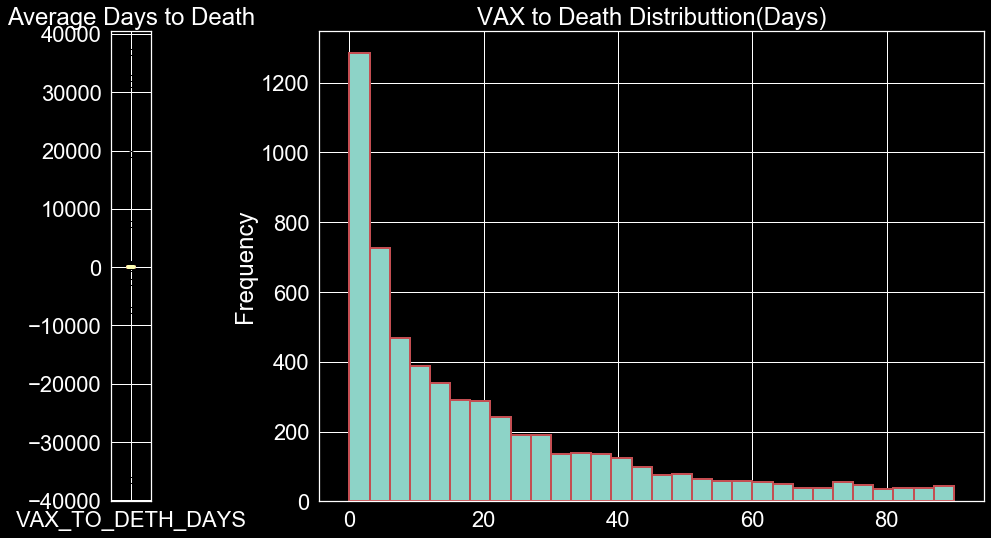

In [69]:

## Not going to chart mistake data(VAX_TO_DETH_DAYS < 0)
df_covid_dead_patients_corrected = df_covid_dead_patients_corrected[df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'] >= 0]

#fig = plt.figure()
fig = plt.figure(figsize=FIGSIZE2)
sns.set(font_scale = (2))
plt.style.use('dark_background')
ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
df_covid_dead_patients['VAX_TO_DETH_DAYS'].plot(kind='box', figsize=LFIGSIZE, ax=ax0, boxprops=dict(linestyle='-', linewidth=4, color='r'), 
                medianprops=dict(linestyle='-', linewidth=4),
                whiskerprops=dict(linestyle='-', linewidth=4, color='g'), 
                capprops=dict(linestyle='-', linewidth=4),)
df_covid_dead_patients_corrected['VAX_TO_DETH_DAYS'].plot(kind='hist', bins=30, figsize=FIGSIZE, edgecolor='r', linewidth=2,ax=ax1)
ax0.set_title('Average Days to Death')
ax1.set_title('VAX to Death Distributtion(Days)')
fig.tight_layout()
plt.show()
plt.show()

## Get daily and weekly VAERS report count data

In [70]:
pd.set_option('display.max_rows', 20)
s=df_covid_patients.groupby(['RECVDATE'])['VAERS_ID'].nunique()
daily_case_count= pd.DataFrame({'DATE': s.index, 'NEW_VAERS_REPORTS': s.values})
#daily_case_count.set_index(['RECVDATE'])
daily_case_count['DATE'] = daily_case_count['DATE'].astype('datetime64[ns]')
#daily_case_count['DATE'] = daily_case_count['DATE'].dt.strftime("%Y/%m/%d")
#daily_case_count['WEEK'] = daily_case_count['DATE'].dt.isocalendar().week

daily_case_count =daily_case_count.sort_values(by='DATE')
daily_case_count.set_index('DATE', inplace=True)
daily_case_count
#weekly_case_count = daily_case_count.resample('w').sum()

,NEW_VAERS_REPORTS
DATE,
2020-12-15,17
2020-12-16,74
2020-12-17,218
2020-12-18,526
2020-12-19,270
...,...
2021-11-22,1638
2021-11-23,2010
2021-11-24,327


In [71]:
# Convert daily report counts to weekly counts
weekly_vaers_reports = daily_case_count.resample('w').sum()
weekly_vaers_reports

,NEW_VAERS_REPORTS
DATE,
2020-12-20,1329
2020-12-27,3696
2021-01-03,7207
2021-01-10,15925
2021-01-17,16166
...,...
2021-10-31,10042
2021-11-07,9421
2021-11-14,10561


## Getting Daily and weekly new VAX admin data


In [72]:
world_covid_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])
us_covid_data = world_covid_data[world_covid_data['iso_code']=='USA']
us_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131337,USA,North ...,United...,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131338,USA,North ...,United...,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131339,USA,North ...,United...,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131340,USA,North ...,United...,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131341,USA,North ...,United...,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-8988.0,-3.62,-2.65,-26.997876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132021,USA,North ...,United...,2021-12-06,492821...,182337.0,119882...,789907.0,1384.0,1541.571,148032...,547.698,360.100,2372.698,4.157,4.631,1.13,14425.0,43.329,57378.0,172.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477746...,237501...,199232...,499781...,1617187.0,1634562.0,143.90,71.53,60.01,15.05,4923.0,359735.0,0.108,NaN,332915...,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
132022,USA,North ...,United...,2021-12-07,493941...,111928.0,119094...,791516.0,1609.0,1565.000,148368...,336.206,357.731,2377.531,4.833,4.701,1.13,14728.0,44.240,58812.0,176.658,NaN,NaN,NaN,NaN,NaN,Na

In [73]:
us_vax_data = pd.DataFrame()
us_vax_data[['DATE', 'NEW_VAX']] = us_covid_data[['date', 'new_vaccinations']] 
us_vax_data.fillna(0,inplace=True)
us_vax_data = us_vax_data[us_vax_data['NEW_VAX']>0]
us_vax_data.set_index('DATE', inplace=True)
us_vax_data


,NEW_VAX
DATE,
2020-12-14,4397.0
2020-12-15,50746.0
2020-12-16,161289.0
2020-12-17,273380.0
2020-12-18,416350.0
...,...
2021-12-06,1617187.0
2021-12-07,1608870.0
2021-12-08,1064166.0


In [74]:
weekly_us_vax_data = us_vax_data.resample('w').sum()
weekly_us_vax_data.index.rename('WEEK', inplace=True)
weekly_us_vax_data

,NEW_VAX
WEEK,
2020-12-20,1192486.0
2020-12-27,1861320.0
2021-01-03,3057364.0
2021-01-10,5679180.0
2021-01-17,7178026.0
...,...
2021-11-14,9784356.0
2021-11-21,102010...
2021-11-28,7239627.0


## Merge weekly Vax data with VAERS report count data

In [76]:
weekly_vaers_reports.index.rename('WEEK', inplace=True)
weekly_vaers_reports


,NEW_VAERS_REPORTS
WEEK,
2020-12-20,1329
2020-12-27,3696
2021-01-03,7207
2021-01-10,15925
2021-01-17,16166
...,...
2021-10-31,10042
2021-11-07,9421
2021-11-14,10561


In [77]:
vax_vs_vaers = pd.merge_asof(weekly_us_vax_data, weekly_vaers_reports, on = 'WEEK', direction = 'nearest' )
vax_vs_vaers.set_index('WEEK', inplace=True)
vax_vs_vaers

,NEW_VAX,NEW_VAERS_REPORTS
WEEK,,
2020-12-20,1192486.0,1329
2020-12-27,1861320.0,3696
2021-01-03,3057364.0,7207
2021-01-10,5679180.0,15925
2021-01-17,7178026.0,16166
...,...,...
2021-11-14,9784356.0,10561
2021-11-21,102010...,10016
2021-11-28,7239627.0,4722


##  Introduct Adverse reaction rate

### ADV_ACTION_RATE = #_Of_VAERS_Reports / #_of_VAX_Admined * 100


In [78]:
#vax_vs_vaers = vax_vs_vaers[vax_vs_vaers['WEEK'] != '2021-01-03']
vax_vs_vaers= vax_vs_vaers[vax_vs_vaers.index != '2020-12-27']
vax_vs_vaers= vax_vs_vaers[vax_vs_vaers.index != '2021-01-03']
vax_vs_vaers['ADV_ACTION_RATE'] = round(vax_vs_vaers['NEW_VAERS_REPORTS'] / vax_vs_vaers['NEW_VAX'] * 100, 2)
vax_vs_vaers

,NEW_VAX,NEW_VAERS_REPORTS,ADV_ACTION_RATE
WEEK,,,
2020-12-20,1192486.0,1329,0.11
2021-01-10,5679180.0,15925,0.28
2021-01-17,7178026.0,16166,0.23
2021-01-24,8395665.0,15132,0.18
2021-01-31,103502...,17998,0.17
...,...,...,...
2021-11-14,9784356.0,10561,0.11
2021-11-21,102010...,10016,0.10
2021-11-28,7239627.0,4722,0.07



<a name='Chart_2'></a>
# Chart 2: New Vaccination and the trend of Adverse Reaction counts
[index](#index)


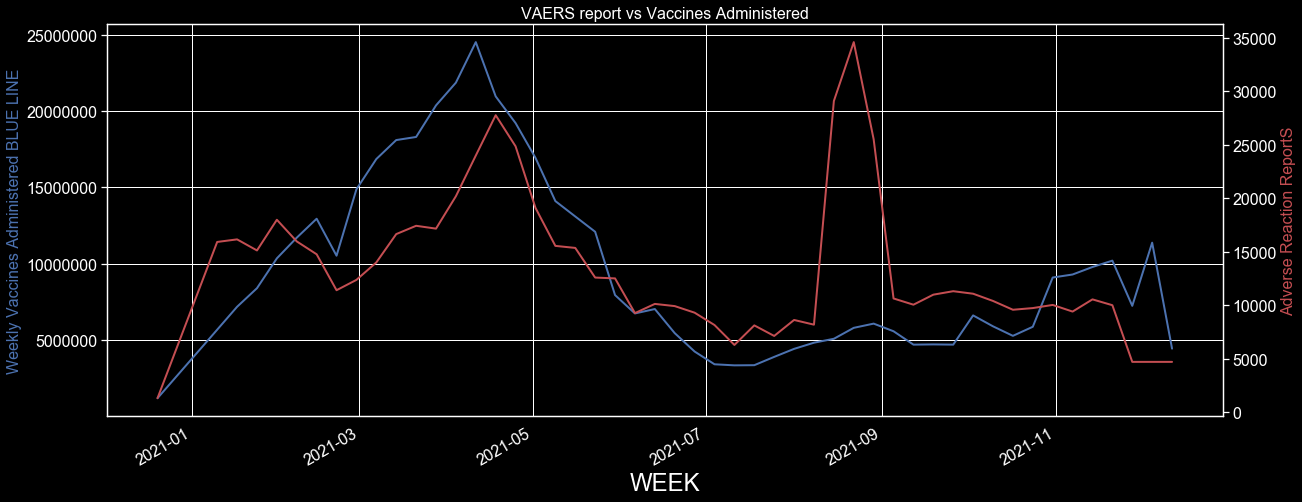

In [79]:
plt.figure(figsize=FIGSIZE2)
ax = vax_vs_vaers['NEW_VAX'].plot(x='WEEK', y='column1', linewidth=2, color='b')
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weekly Vaccines Administered BLUE LINE', fontsize=16, color='b')
ax2 = ax.twinx()
plt.yticks(fontsize=16)
plt.title('VAERS report vs Vaccines Administered', fontsize=16, color='w')
plt.ylabel('Adverse Reaction ReportS', fontsize=16, color='r')
ax2 = vax_vs_vaers['NEW_VAERS_REPORTS'].plot(x='WEEK', y='column2', ax=ax2, color='r', linewidth=2)
plt.grid(None)
plt.show()

## Observations
- Overall the VAERS reports trends over time are matching the trend of total vax counts, with a few exceptionts:
    - begining of the vax program: higher adverse reaction rate observed
    - Aug. 2021 - Sep. 2021: a big spike in reporting. Maybe related to batches during that period?


<a name='Chart_3'></a>
# Chart 3: New Vaccination and the trend of Adverse Reaction Rate
[index](#index)




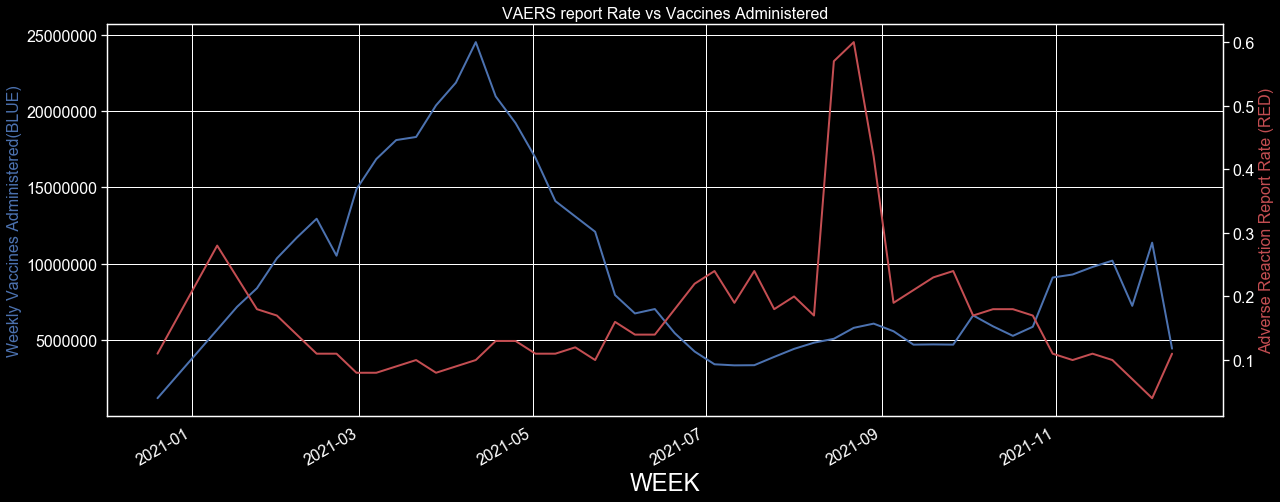

In [80]:
plt.figure(figsize=FIGSIZE2)
ax = vax_vs_vaers['NEW_VAX'].plot(x='WEEK', y='column1', linewidth=2, color='b')
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weekly Vaccines Administered(BLUE)', fontsize=16, color='b')
ax2 = ax.twinx()
plt.yticks(fontsize=16)
plt.title('VAERS report Rate vs Vaccines Administered', fontsize=16)
plt.ylabel('Adverse Reaction Report Rate (RED)', fontsize=16, color='r')
ax2 = vax_vs_vaers['ADV_ACTION_RATE'].plot(x='WEEK', y='column2', ax=ax2, color='r', linewidth=2)
plt.grid(None)
plt.show()

## Get an idea on multiple-symptom reports

In [120]:
check_duplicates(df_covid_patients)
check_duplicates(df_covid_symptoms)
check_duplicates(df_covid_vax)

Doulicate Rows: 
Empty DataFrame
Columns: [VAERS_ID, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES]
Index: []
Doulicate Rows: 
Empty DataFrame
Columns: [VAERS_ID, SYMPTOM1, SYMPTOMVERSION1, SYMPTOM2, SYMPTOMVERSION2, SYMPTOM3, SYMPTOMVERSION3, SYMPTOM4, SYMPTOMVERSION4, SYMPTOM5, SYMPTOMVERSION5]
Index: []
Doulicate Rows: 
        VAERS_ID VAX_TYPE   VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
51013     907159  COVID19  PFIZER...   EH9899          1            SYR   
51169     907330  COVID19    MODERNA  011J20A          1            SYR   
54527     911085  COVID19  PFIZER...   EH9899          1             IM   
55785     912442  COVID19  PFIZER...      NaN        UNK            NaN   
57106  

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
46536,902418,COVID19,PFIZER...,EH9899,1,IM,LA,COVID1...
46555,902440,COVID19,PFIZER...,EH 9899,1,SYR,LA,COVID1...
46562,902446,COVID19,PFIZER...,EH9899,1,IM,RA,COVID1...
46582,902464,COVID19,PFIZER...,EH9899,UNK,IM,LA,COVID1...
46583,902465,COVID19,PFIZER...,EH9899,1,IM,RA,COVID1...
...,...,...,...,...,...,...,...,...
738656,1901708,COVID19,MODERNA,013F21A,UNK,OT,NaN,COVID1...
738657,1901709,COVID19,MODERNA,049E21A,1,OT,NaN,COVID1...
738658,1901710,COVID19,MODERNA,010A21A,1,OT,NaN,COVID1...
738659,1901711,COVID19,MODERNA,010A21A,1,OT,NaN,COVID1...


In [121]:
print(df_covid_patients.shape)
print(df_covid_symptoms.shape)
print(df_covid_vax.shape)

(672346, 35)
(903718, 11)
(699812, 8)


In [122]:
# Study table columns
print(df_covid_patients.columns)
print(df_covid_symptoms.columns)
print(df_covid_vax.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')
Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')
Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')


In [123]:
print(df_covid_patients["VAERS_ID"].nunique())
print(df_covid_symptoms["VAERS_ID"].nunique())
print(df_covid_vax["VAERS_ID"].nunique())
print(df_covid_vax.VAX_TYPE.unique())

672346
672343
672346
['COVID19']


In [113]:
df_covid_patients.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
36917,902418,12/15/...,NJ,56.0,56.0,NaN,F,NaN,Patien...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,none,PVT,NaN,latex,none,none,NaN,NaN,2,12/15/...,NaN,NaN,NaN,none
36931,902440,12/15/...,AZ,35.0,35.0,NaN,F,NaN,C/O He...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,none,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,12/15/...,NaN,NaN,NaN,NaN
36937,902446,12/15/...,WV,55.0,55.0,NaN,F,NaN,felt w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,She to...,OTH,NaN,Novasc...,none,Hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Contra...
36955,902464,12/15/...,LA,42.0,42.0,NaN,M,NaN,within...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,Basic ...,PVT,NaN,none,none,none,NaN,NaN,2,12/15/...,NaN,NaN,Y,none
36956,902465,12/15/...,AR,60.0,60.0,NaN,F,NaN,Pt fel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/15/...,12/15/...,0.0,BP.,PUB,NaN,Lisino...,Bronch...,hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Biaxin


In [125]:
dirty_df_covid_patients = df_covid_patients
dirty_df_covid_symptoms = df_covid_symptoms
dirty_df_covid_vax = df_covid_vax

In [126]:
merged_covid_vaers_data = dirty_df_covid_patients.merge(dirty_df_covid_vax, on = 'VAERS_ID', how = 'inner')
merged_covid_vaers_data = merged_covid_vaers_data.merge(dirty_df_covid_symptoms, on = 'VAERS_ID', how = 'inner')

In [127]:
merged_covid_vaers_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,902418,12/15/...,NJ,56.0,56.0,NaN,F,NaN,Patien...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,none,PVT,NaN,latex,none,none,NaN,NaN,2,12/15/...,NaN,NaN,NaN,none,COVID19,PFIZER...,EH9899,1,IM,LA,COVID1...,Hypoae...,24.0,Inject...,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,902440,12/15/...,AZ,35.0,35.0,NaN,F,NaN,C/O He...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,none,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,12/15/...,NaN,NaN,NaN,NaN,COVID19,PFIZER...,EH 9899,1,SYR,LA,COVID1...,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,902446,12/15/...,WV,55.0,55.0,NaN,F,NaN,felt w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,She to...,OTH,NaN,Novasc...,none,Hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Contra...,COVID19,PFIZER...,EH9899,1,IM,RA,COVID1...,Erythema,23.1,Feelin...,23.1,Flushing,23.1,NaN,NaN,NaN,NaN
3,902464,12/15/...,LA,42.0,42.0,NaN,M,NaN,within...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/...,12/15/...,0.0,Basic ...,PVT,NaN,none,none,none,NaN,NaN,2,12/15/...,NaN,NaN,Y,none,COVID19,PFIZER...,EH9899,UNK,IM,LA,COVID1...,Dizziness,23.1,Electr...,23.1,Hyperh...,23.1,Labora...,23.1,Presyn...,23.1
4,902465,12/15/...,AR,60.0,60.0,NaN,F,NaN,Pt fel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/15/...,12/15/...,0.0,BP.,PUB,NaN,Lisino...,Bronch...,hypert...,NaN,NaN,2,12/15/...,NaN,NaN,NaN,Biaxin,COVID19,PFIZER...,EH9899,1,IM,RA,COVID1...,Dysgeusia,23.1,Oral p...,23.1,Paraes...,23.1,Paraes...,23.1,Parosmia,23.1


In [131]:
# Check duplicated data
merged_covid_vaers_data[merged_covid_vaers_data.duplicated()]
print(merged_covid_vaers_data.VAERS_ID.value_counts())

1591843    54
1019670    42
1894417    42
1880791    39
1233421    38
           ..
1214470     1
1214469     1
1214468     1
1214466     1
1901712     1
Name: VAERS_ID, Length: 672343, dtype: int64


In [132]:
merged_covid_vaers_data.loc[merged_covid_vaers_data['VAERS_ID'] == 1591843 ]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
684383,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,001B21A,1,SYR,LA,COVID1...,Abdomi...,24.0,Activa...,24.0,Alanin...,24.0,Ammoni...,24.0,Angiot...,24.0
684384,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,001B21A,1,SYR,LA,COVID1...,Anion ...,24.0,Antine...,24.0,Antinu...,24.0,Asthenia,24.0,Atelec...,24.0
684385,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,001B21A,1,SYR,LA,COVID1...,Bacter...,24.0,Biliru...,24.0,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0
684386,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,001B21A,1,SYR,LA,COVID1...,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0
684387,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,001B21A,1,SYR,LA,COVID1...,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0,Blood ...,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684432,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,037A21B,2,SYR,LA,COVID1...,Red ce...,24.0,Rheuma...,24.0,SARS-C...,24.0,Scan w...,24.0,Scoliosis,24.0
684433,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,037A21B,2,SYR,LA,COVID1...,Serum ...,24.0,Sinus ...,24.0,Spinal...,24.0,Tachyc...,24.0,Trepon...,24.0
684434,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,037A21B,2,SYR,LA,COVID1...,Urine ...,24.0,Urine ...,24.0,Viral ...,24.0,Visual...,24.0,Vitami...,24.0
684435,1591843,08/20/...,NC,23.0,23.0,NaN,F,NaN,On 3-1...,NaN,NaN,NaN,NaN,Y,14.0,NaN,Y,N,04/10/...,05/08/...,28.0,Test- ...,PHM,NaN,Tri-Sp...,Post- ...,Polycy...,NaN,NaN,2,08/20/...,NaN,Y,Y,N/a,COVID19,MODERNA,037A21B,2,SYR,LA,COVID1...,Vitami...,24.0,Vitami...,24.0,Vitamin D,24.0,Vomiting,24.0,Wheelc...,24.0


In [97]:
# count of unique value of each column
print(merged_covid_vaers_data.nunique())
print(merged_covid_vaers_data.STATE.unique())

VAERS_ID           749848
RECVDATE              696
STATE                  71
AGE_YRS               159
CAGE_YR               116
                    ...  
SYMPTOMVERSION3         5
SYMPTOM4             6159
SYMPTOMVERSION4         5
SYMPTOM5             5699
SYMPTOMVERSION5         5
Length: 52, dtype: int64
['HI' 'WI' nan 'TX' 'FL' 'GA' 'MO' 'IN' 'OR' 'CA' 'IL' 'LA' 'VA' 'UT' 'NJ'
 'ID' 'WA' 'NH' 'PA' 'NY' 'MI' 'CO' 'MN' 'AZ' 'KS' 'NC' 'TN' 'MT' 'WV'
 'SC' 'MA' 'AR' 'MD' 'MS' 'NE' 'OK' 'CT' 'ME' 'OH' 'KY' 'SD' 'NM' 'AL'
 'RI' 'NV' 'IA' 'DE' 'ND' 'VT' 'WY' 'PR' 'AK' 'Ne' 'DC' 'GU' 'FM' 'Mi'
 'Tx' 'VI' 'Fl' 'or' 'MH' 'Ar' 'PW' 'MP' 'Co' 'AS' 'XB' 'Ca' 'QM' 'XL'
 'XV']


## Study Multiple symptom/does cases

In [133]:

print(merged_covid_vaers_data['VAERS_ID'].value_counts())

1591843    54
1019670    42
1894417    42
1880791    39
1233421    38
           ..
1214470     1
1214469     1
1214468     1
1214466     1
1901712     1
Name: VAERS_ID, Length: 672343, dtype: int64


In [138]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 100
merged_covid_vaers_data[merged_covid_vaers_data['VAERS_ID']==1894417]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
944446,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Adenovirus test,24.1,Anion gap decreased,24.1,Basophil count abnormal,24.1,Basophil percentage,24.1,Blood calcium increased,24.1
944447,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Blood chloride normal,24.1,Blood creatinine normal,24.1,Blood glucose normal,24.1,Blood osmolarity decreased,24.1,Blood potassium normal,24.1
944448,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Blood sodium normal,24.1,Blood urea decreased,24.1,Bordetella test,24.1,Bordetella test negative,24.1,Carbon dioxide,24.1
944449,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Cerebral venous sinus thrombosis,24.1,Chlamydia test negative,24.1,Dehydration,24.1,Diarrhoea,24.1,Differential white blood cell count,24.1
944450,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Enterovirus test negative,24.1,Eosinophil count decreased,24.1,Eosinophil percentage decreased,24.1,Full blood count,24.1,Glomerular filtration rate increased,24.1
944451,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Haematocrit normal,24.1,Haemoglobin normal,24.1,Headache,24.1,Human metapneumovirus test,24.1,Human rhinovirus test,24.1
944452,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/2021,0.0,NaN,PVT,NaN,none,none,none,NaN,NaN,2,11/23/2021,NaN,Y,NaN,NKA,COVID19,MODERNA,048F21A,3,IM,LA,COVID19 (COVID19 (MODERNA)),Hypotension,24.1,Hypovolaemia,24.1,Inappropriate schedule of product administration,24.1,Influenza A virus test negative,24.1,Influenza B virus test,24.1
944453,1894417,11/23/2021,OR,36.0,36.0,NaN,F,NaN,"Immediately after receiving the Moderna booster dose, she developed H/A, nausea, and spinning ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/13/2021,11/13/

In [141]:
df_covid_vax[df_covid_vax['VAERS_ID']==1591843]

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
529572,1591843,COVID19,MODERNA,001B21A,1,SYR,LA,COVID19 (COVID19 (MODERNA))
529573,1591843,COVID19,MODERNA,037A21B,2,SYR,LA,COVID19 (COVID19 (MODERNA))


In [142]:
df_covid_symptoms[df_covid_symptoms['VAERS_ID']==1591843]

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
673423,1591843,Abdominal X-ray,24.0,Activated partial thromboplastin time normal,24.0,Alanine aminotransferase increased,24.0,Ammonia normal,24.0,Angiotensin converting enzyme,24.0
673424,1591843,Anion gap increased,24.0,Antineutrophil cytoplasmic antibody negative,24.0,Antinuclear antibody negative,24.0,Asthenia,24.0,Atelectasis,24.0
673425,1591843,Bacterial test,24.0,Bilirubin urine present,24.0,Blood albumin decreased,24.0,Blood calcium decreased,24.0,Blood chloride decreased,24.0
673426,1591843,Blood creatine phosphokinase MB normal,24.0,Blood creatine phosphokinase normal,24.0,Blood creatinine decreased,24.0,Blood ethanol decreased,24.0,Blood fibrinogen decreased,24.0
673427,1591843,Blood folate normal,24.0,Blood glucose increased,24.0,Blood heavy metal normal,24.0,Blood lactate dehydrogenase increased,24.0,Blood lactic acid normal,24.0
673428,1591843,Blood magnesium normal,24.0,Blood phosphorus normal,24.0,Blood potassium decreased,24.0,Blood sodium decreased,24.0,Blood thyroid stimulating hormone normal,24.0
673429,1591843,Blood urea decreased,24.0,Blood urea nitrogen/creatinine ratio decreased,24.0,Blood urine present,24.0,Body fluid analysis,24.0,Borrelia test negative,24.0
673430,1591843,C-reactive protein increased,24.0,CSF cell count normal,24.0,CSF culture negative,24.0,CSF glucose increased,24.0,CSF protein increased,24.0
673431,1591843,CSF protein normal,24.0,CSF red blood cell count positive,24.0,CSF test normal,24.0,CSF white blood cell count negative,24.0,CSF white blood cell differential,24.0
673432,1591843,Calcium ionised normal,24.0,Carbon dioxide decreased,24.0,Catheterisation cardiac abnormal,24.0,Chest X-ray normal,24.0,Cholelithiasis,24.0


In [143]:
# Change text data to upper cases
merged_covid_vaers_data= merged_covid_vaers_data.applymap(lambda s:s.upper() if type(s) == str else s)

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 100
merged_covid_vaers_data[['VAERS_ID','SYMPTOM_TEXT']]

,VAERS_ID,SYMPTOM_TEXT
0,902418,PATIENT EXPERIENCED MILD NUMBNESS TRAVELING FROM INJECTION SITE UP AND DOWN ARM THAT SUBSIDED OV...
1,902440,C/O HEADACHE
2,902446,"FELT WARM, HOT AND FACE AND EARS WERE RED AND FLUSHED."
3,902464,WITHIN 15 MINUTES PROGRESSIVE LIGHT-HEADEDNESS LEADING TO NEAR-SYNCOPE AND DIAPHORESIS. AFTER 2...
4,902465,"PT FELT WAVE COME OVER BODY @ 1218 STARTING IN HEAD AND GOING DOWN. BAD TASTE IN MOUTH, TINGLING..."
...,...,...
946868,1901708,RECEIVED DOSE FROM A VIAL PUNCTURED MORE THAN 20 TIMES; THIS SPONTANEOUS CASE WAS REPORTED BY AN...
946869,1901709,EXPIRED VACCINE USED; THIS SPONTANEOUS CASE WAS REPORTED BY AN OTHER HEALTH CARE PROFESSIONAL AN...
946870,1901710,SORE ARM; THIS SPONTANEOUS CASE WAS REPORTED BY A CONSUMER AND DESCRIBES THE OCCURRENCE OF VACCI...
946871,1901711,SORE ARM; THIS SPONTANEOUS CASE WAS REPORTED BY A CONSUMER AND DESCRIBES THE OCCURRENCE OF PAIN ...


# Report functions



In [150]:
def ana_disease(df : pd.DataFrame, disease : str, bins : int):
    NO_OF_BINS=bins
    df_disease = df[df.eq(disease.upper()).any(1)]
    #print(df_disease.head())
    #print(df_disease['VAERS_ID'].duplicated())
    df_chart = df_disease[['VAERS_ID', 'AGE_YRS']]
    df_chart.drop_duplicates()
    print("List of Vaers ID:")
    print(df_chart)
    print("Total # of reports: ", df_chart.shape[0])
    fig = plt.figure()
    sns.set(font_scale = (2))
    plt.style.use('dark_background')
    ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
    ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
    df_chart['AGE_YRS'].plot(kind='box', figsize=LFIGSIZE, ax=ax0, boxprops=dict(linestyle='-', linewidth=4, color='r'), 
                    medianprops=dict(linestyle='-', linewidth=4),
                    whiskerprops=dict(linestyle='-', linewidth=4, color='g'), 
                    capprops=dict(linestyle='-', linewidth=4),)
    df_chart['AGE_YRS'].plot(kind='hist', bins=NO_OF_BINS, figsize=FIGSIZE, edgecolor='r', linewidth=2,ax=ax1)
    ax0.set_title('Average Age')
    ax1.set_title( disease.capitalize() + ' Reactions by Age')
    fig.tight_layout()


<a name='Chart_4'></a>
# Chart 4: Cancer Reaction by Age
[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
11735     914623     47.0
31077     930294     46.0
50759     944925     31.0
50760     944925     31.0
72857     965135     50.0
...          ...      ...
934695   1880917     87.0
934696   1880917     87.0
935625   1883978      NaN
937121   1885395     63.0
944192   1894222     69.0

[373 rows x 2 columns]
Total # of reports:  373


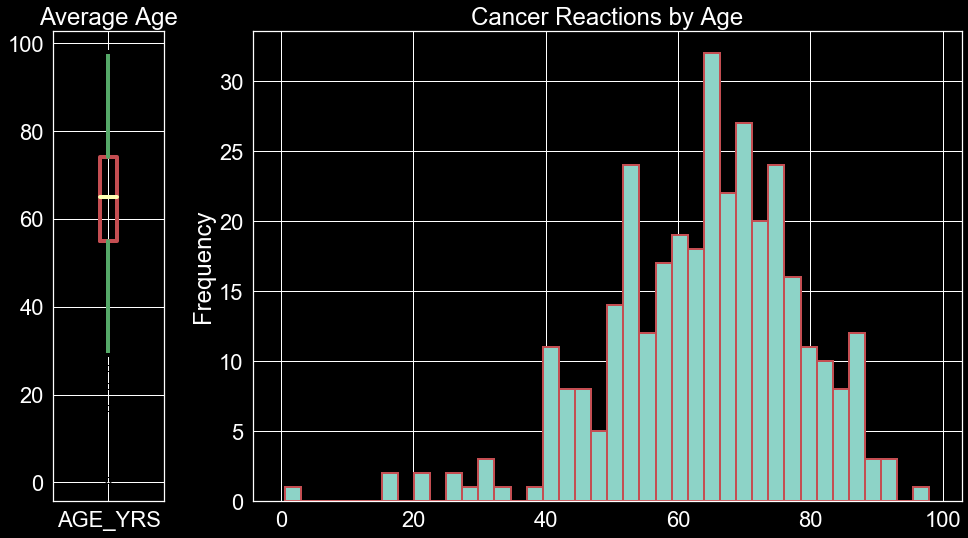

In [151]:
ana_disease(merged_covid_vaers_data, 'CANCER', 40)


<a name='Chart_5'></a>
# Chart 5: Myocarditis Reaction by Age
[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
39139     935452     44.0
42274     937932     28.0
58870     952497     40.0
59892     953557     18.0
70731     963213     30.0
...          ...      ...
946337   1899682      NaN
946404   1901103     22.0
946525   1901192      8.0
946537   1901265     54.0
946694   1901404     73.0

[2269 rows x 2 columns]
Total # of reports:  2269


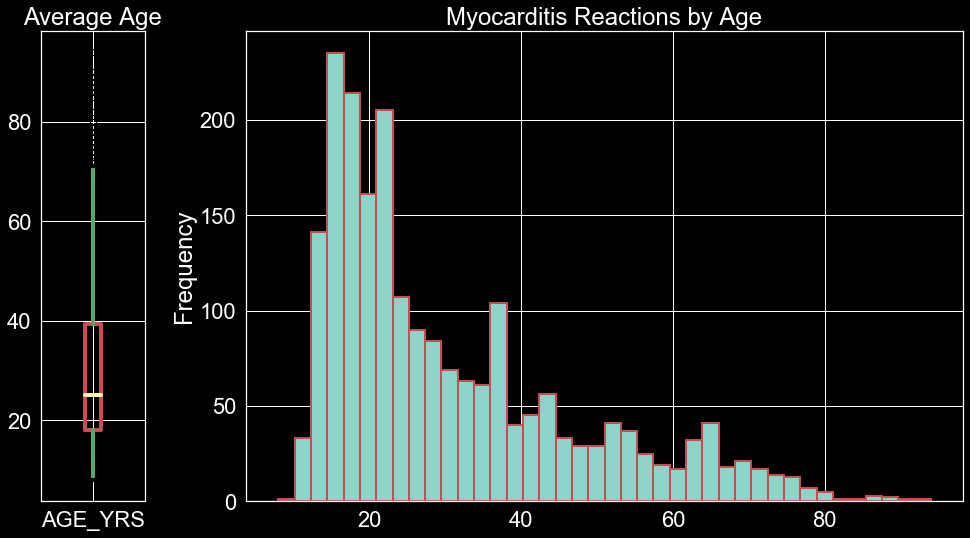

In [152]:
ana_disease(merged_covid_vaers_data, 'MYOCARDITIS', 40)

<a name='Chart_6'></a>
# Chart 6: Syncope Reaction by Age
Syncope: Fainting, or a sudden temporary loss of consciousness.

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
177       903014     86.0
203       903047     52.0
418       903338     30.0
563       903510     24.0
873       903827     49.0
...          ...      ...
945453   1896519     21.0
945662   1896472     21.0
945856   1896764     26.0
945882   1896788      8.0
945886   1896791      8.0

[14233 rows x 2 columns]
Total # of reports:  14233


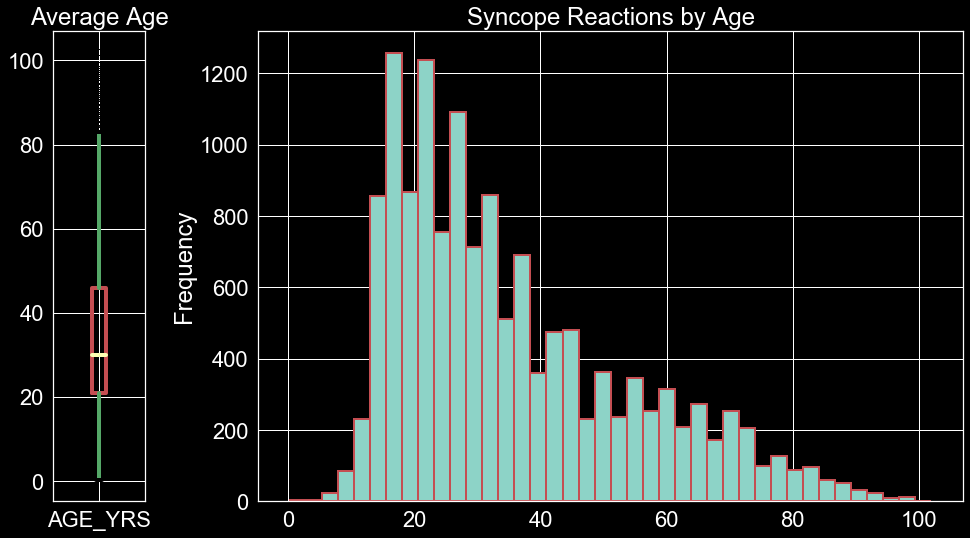

In [153]:
ana_disease(merged_covid_vaers_data, 'Syncope', 40) # Fainting, or a sudden temporary loss of consciousness.

<a name='Chart_7'></a>
# Chart 7: Seizure Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
410       903332     51.0
1133      904052     41.0
1460      904359     19.0
1953      905183     51.0
3030      906532     40.0
...          ...      ...
946089   1899336     61.0
946193   1899454     64.0
946312   1899618      NaN
946508   1901182     82.0
946580   1901301     37.0

[4531 rows x 2 columns]
Total # of reports:  4531


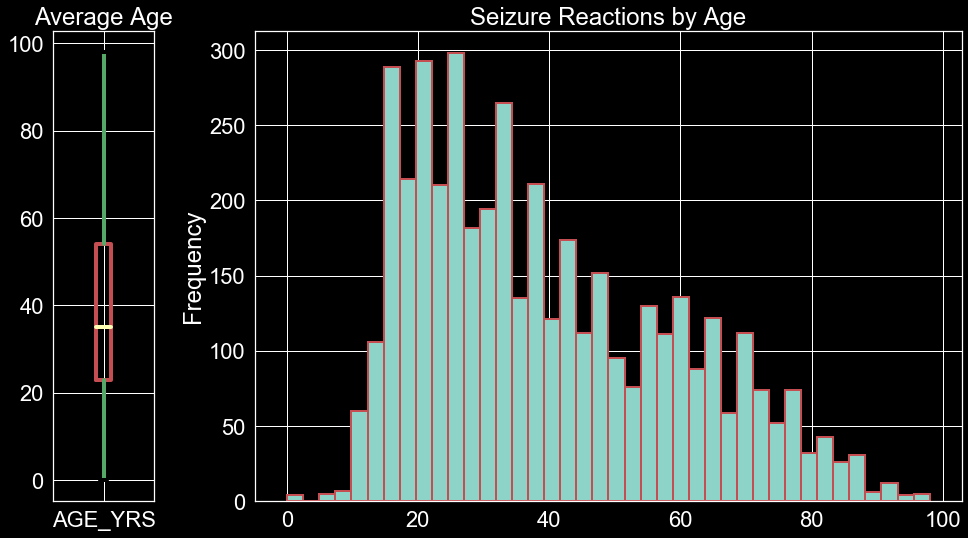

In [154]:
ana_disease(merged_covid_vaers_data, 'Seizure', 40) # 

<a name='Chart_8'></a>
# Chart 8: Blindness Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
2209      905675     39.0
2482      905934     36.0
4005      907531     34.0
5458      908960     53.0
5656      909111     28.0
...          ...      ...
944835   1894651     43.0
945790   1896660     67.0
946072   1899322     28.0
946197   1899456     62.0
946311   1899618      NaN

[1054 rows x 2 columns]
Total # of reports:  1054


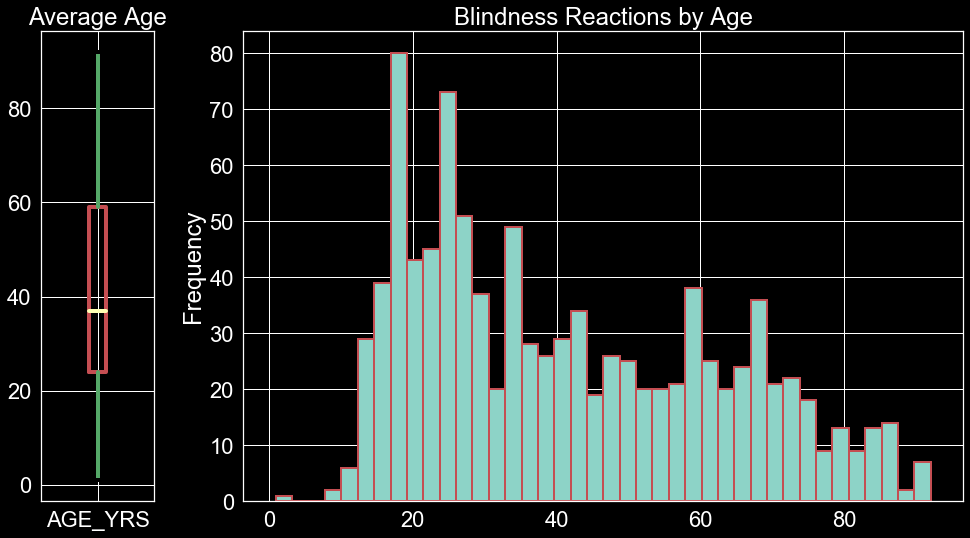

In [155]:
ana_disease(merged_covid_vaers_data, 'Blindness', 40) #

<a name='Chart_9'></a>
# Chart 9: Deafness Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
2713      906125      NaN
12909     915639     64.0
13552     916200     69.0
30798     930071     80.0
31768     930862     39.0
...          ...      ...
941975   1890569     53.0
943615   1893791     65.0
944334   1894323     67.0
944838   1894651     43.0
946515   1901187     65.0

[1432 rows x 2 columns]
Total # of reports:  1432


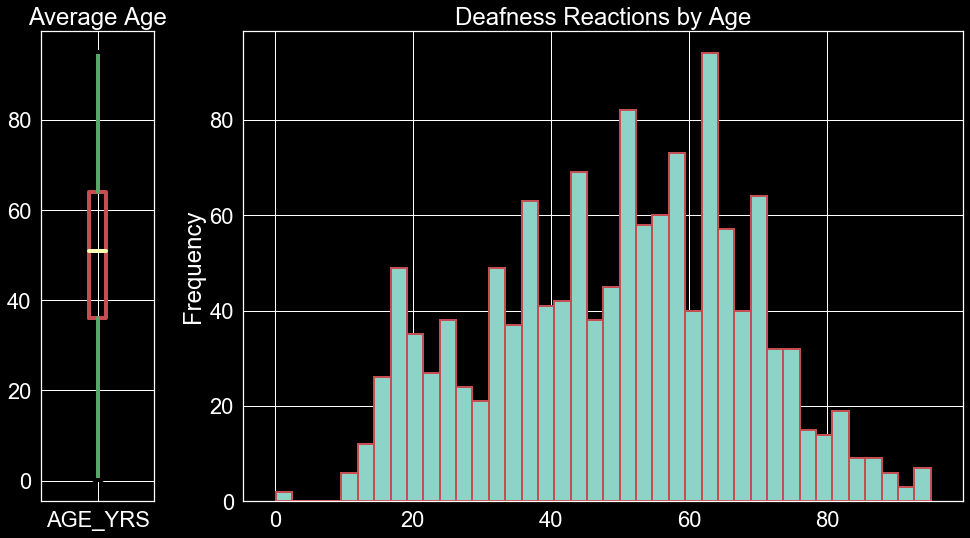

In [156]:
ana_disease(merged_covid_vaers_data, 'deafness', 40) # 

<a name='Chart_10'></a>
# Chart 10: Lip swelling Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
26        902597     36.0
686       903658     42.0
718       903687     41.0
779       903740     35.0
805       903762     48.0
...          ...      ...
943924   1894030     29.0
944850   1894657     67.0
946189   1899451      NaN
946481   1901169     37.0
946791   1901620     54.0

[5175 rows x 2 columns]
Total # of reports:  5175


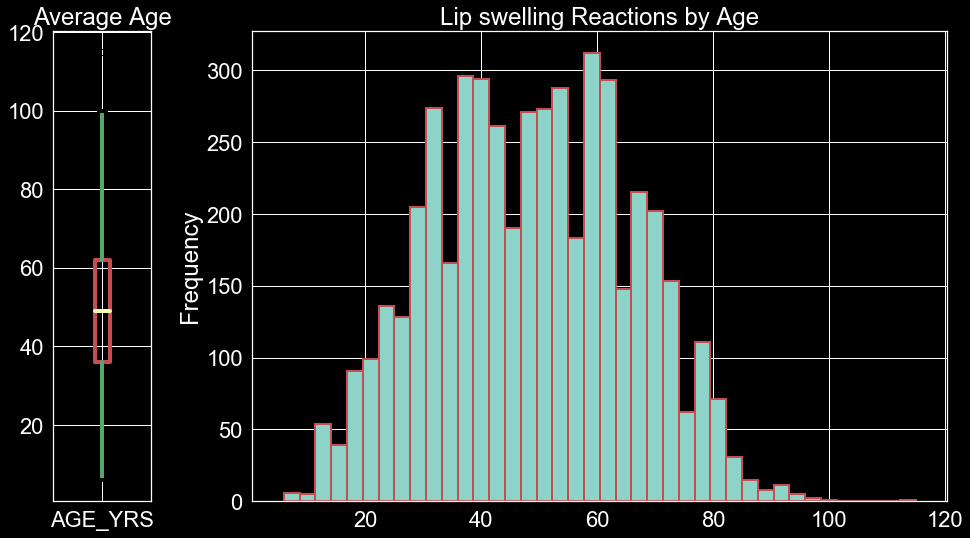

In [157]:
ana_disease(merged_covid_vaers_data, 'Lip swelling', 40) # 

<a name='Chart_11'></a>
# Chart 11: Intensive Care Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
8         902479     46.0
468       903400     55.0
768       903731     48.0
2524      905974     44.0
2614      906282     55.0
...          ...      ...
944158   1894205     75.0
944914   1894694     88.0
944918   1894694     88.0
944957   1894716     65.0
945933   1899226     54.0

[2317 rows x 2 columns]
Total # of reports:  2317


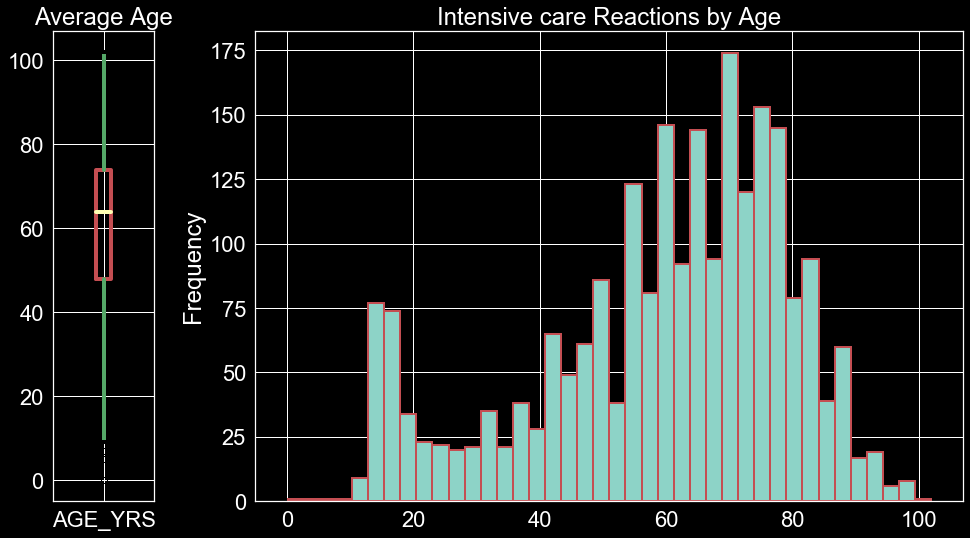

In [158]:
ana_disease(merged_covid_vaers_data, 'Intensive care', 40) # 

<a name='Chart_12'></a>
# Chart 12: Loss of Consciousness Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
103       902832     33.0
177       903014     86.0
563       903510     24.0
1235      904158     29.0
1486      904385     83.0
...          ...      ...
945886   1896791      8.0
946063   1899315     31.0
946090   1899337     81.0
946199   1899456     62.0
946311   1899618      NaN

[10412 rows x 2 columns]
Total # of reports:  10412


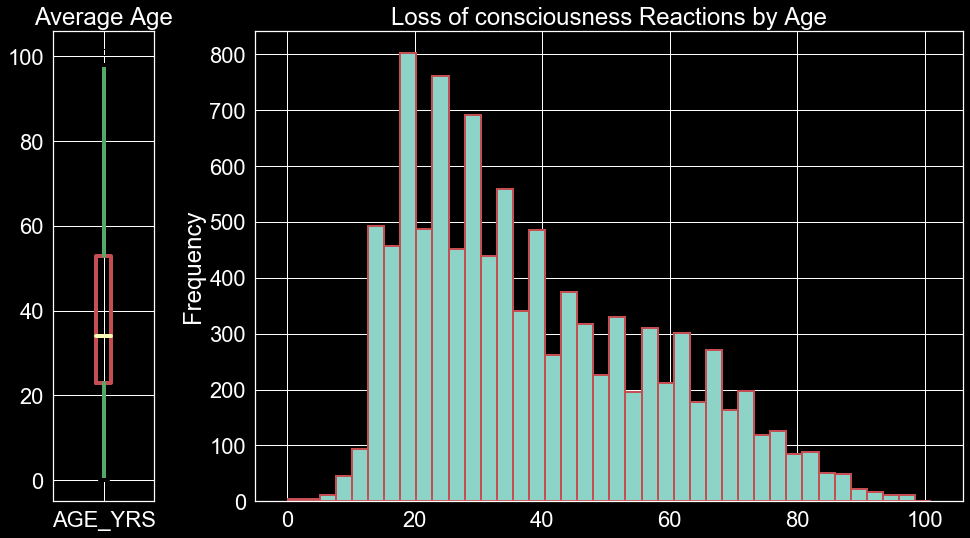

In [159]:
ana_disease(merged_covid_vaers_data, 'loss of consciousness', 40) # 

<a name='Chart_13'></a>
# Chart 13: Tremor Reaction by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
5         902465     60.0
70        902768     42.0
108       902836     25.0
181       903016     54.0
192       903030     54.0
...          ...      ...
946312   1899618      NaN
946342   1899686     18.0
946488   1901172     34.0
946581   1901301     37.0
946763   1901594     74.0

[13414 rows x 2 columns]
Total # of reports:  13414


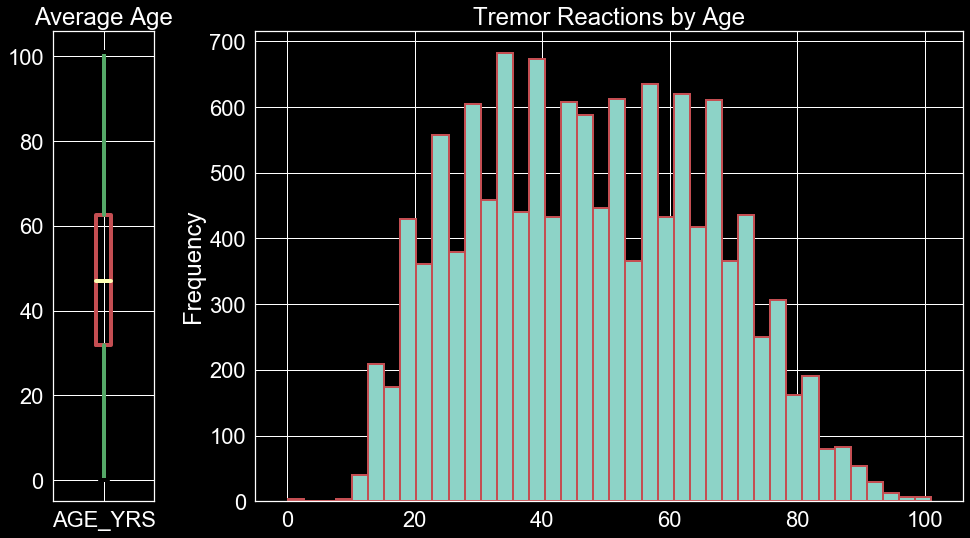

In [160]:
ana_disease(merged_covid_vaers_data, 'Tremor', 40) # Tremor is an involuntary, rhythmic muscle contraction leading to shaking movements in one or more parts of the body.

<a name='Chart_14'></a>
# Chart 14: Speech disorder by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
1359      904271     56.0
2298      905761     50.0
2696      906077     43.0
2761      906232     59.0
3397      906939     38.0
...          ...      ...
946312   1899618      NaN
946557   1901281     83.0
946581   1901301     37.0
946782   1901612     45.0
946784   1901613     55.0

[1681 rows x 2 columns]
Total # of reports:  1681


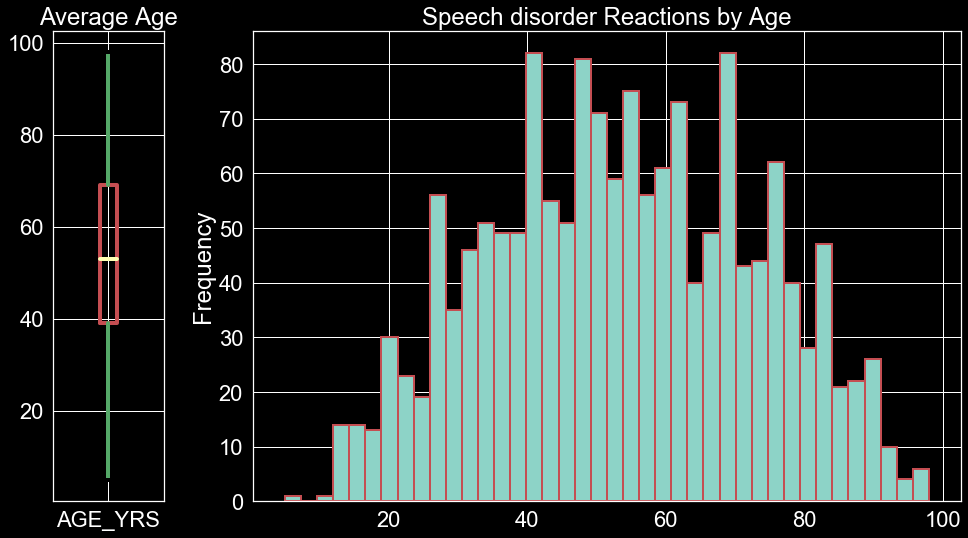

In [161]:
ana_disease(merged_covid_vaers_data, 'Speech disorder', 40)

<a name='Chart_15'></a>
# Chart 15: Dysphagia by Age
Dysphagia: trouble swallowing

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
78        902791     51.0
109       902837     29.0
190       903030     54.0
402       903324     31.0
524       903469     46.0
...          ...      ...
944564   1894467     53.0
944617   1894502     54.0
944903   1894688     52.0
946578   1901301     37.0
946783   1901613     55.0

[4828 rows x 2 columns]
Total # of reports:  4828


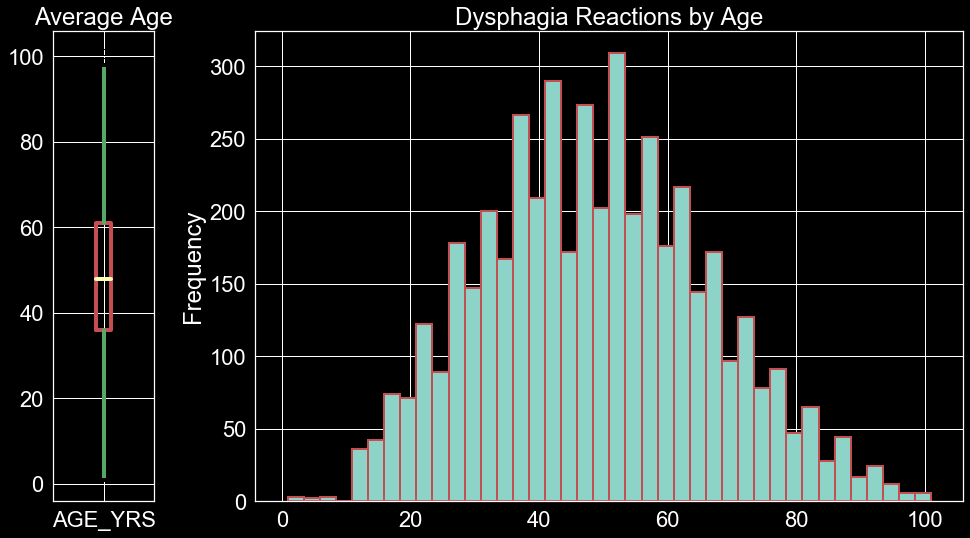

In [162]:
ana_disease(merged_covid_vaers_data, 'Dysphagia', 40) # trouble swallowing

<a name='Chart_16'></a>
# Chart 16: Dyskinesia by Age
Dyskinesia: Erratic movements like in Parkinson’s

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
468       903400     55.0
613       903569     48.0
1691      904560     24.0
2077      905503     43.0
2574      906025     27.0
...          ...      ...
939715   1888714     14.0
939716   1888714     14.0
939745   1888734     28.0
939838   1888799     40.0
942289   1890947     43.0

[1223 rows x 2 columns]
Total # of reports:  1223


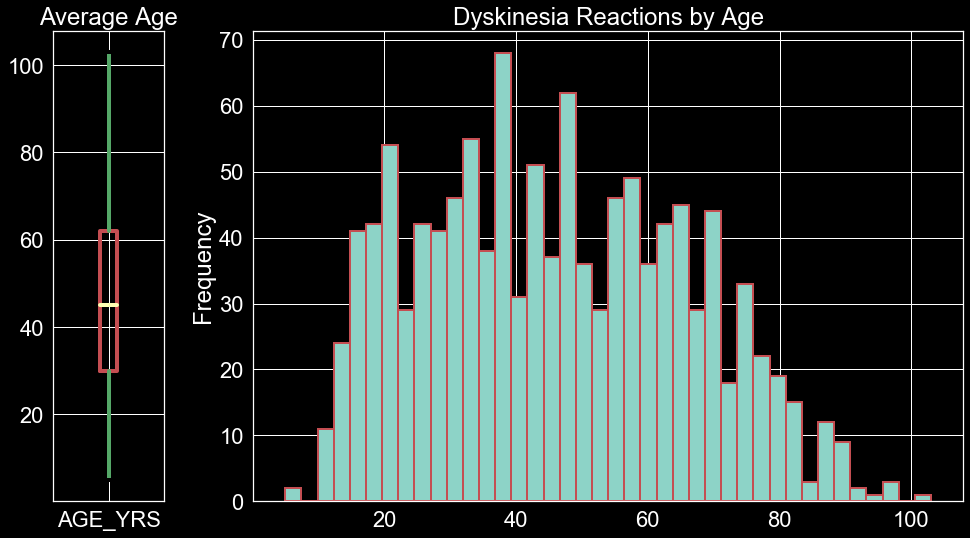

In [163]:
ana_disease(merged_covid_vaers_data, 'Dyskinesia', 40) # erratic movements like in Parkinson’s

<a name='Chart_17'></a>
# Chart 17: Facial paralysis by Age

[index](#index)

List of Vaers ID:
        VAERS_ID  AGE_YRS
391       903318     35.0
978       903916     37.0
1024      903960     41.0
2314      905777     39.0
2336      905797     28.0
...          ...      ...
944010   1894099     34.0
944158   1894205     75.0
944586   1894484     65.0
944763   1894604     48.0
946579   1901301     37.0

[2576 rows x 2 columns]
Total # of reports:  2576


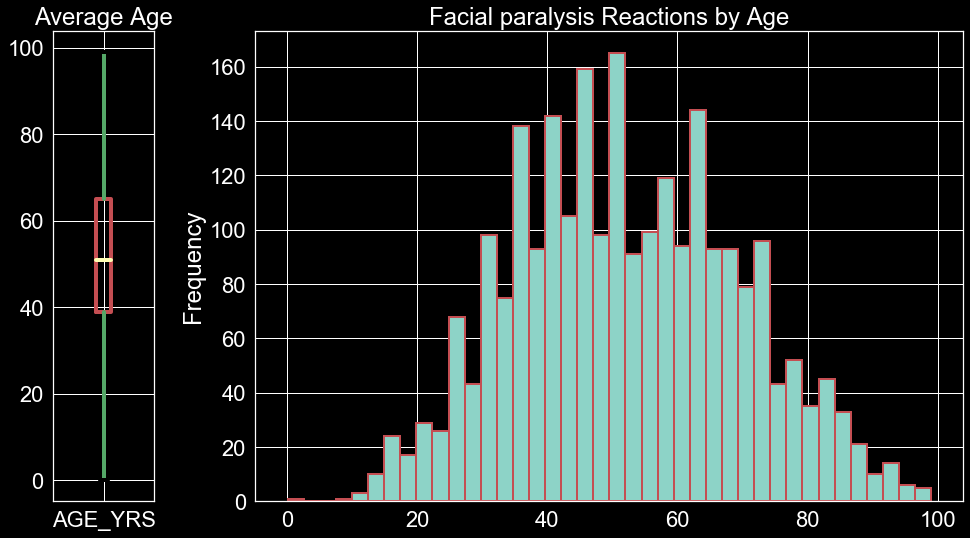

In [164]:
ana_disease(merged_covid_vaers_data, 'Facial paralysis', 40) 

# Disease group analysis

In [165]:
def ana_diseasegroup(df : pd.DataFrame, disease_group : list, bins : int):
    NO_OF_BINS=bins
    disease_group = [ each_string.upper() for each_string in disease_group ]
    df_disease = df[df.isin(disease_group).any(1)]
    #print(df_disease.head())
    #print(df_disease['VAERS_ID'].duplicated())
    df_chart = df_disease[['VAERS_ID', 'AGE_YRS']]
    df_chart.drop_duplicates()
    fig = plt.figure()
    sns.set(font_scale = (2))
    plt.style.use('dark_background')
    ax0 = plt.subplot2grid((1,5), (0,0), colspan=1)
    ax1 = plt.subplot2grid((1,5), (0,1), colspan=4)
    df_chart['AGE_YRS'].plot(kind='box', figsize=LFIGSIZE, ax=ax0, boxprops=dict(linestyle='-', linewidth=4, color='r'), 
                    medianprops=dict(linestyle='-', linewidth=4),
                    whiskerprops=dict(linestyle='-', linewidth=4, color='g'), 
                    capprops=dict(linestyle='-', linewidth=4),)
    df_chart['AGE_YRS'].plot(kind='hist', bins=NO_OF_BINS, figsize=FIGSIZE, edgecolor='r', linewidth=2,ax=ax1)
    ax0.set_title('Average Age')
    ax1.set_title( 'Reactions by Age')
    fig.tight_layout()

<a name='Chart_18'></a>
# Chart 18: Blook Clots Reaction by Age
[index](#index)

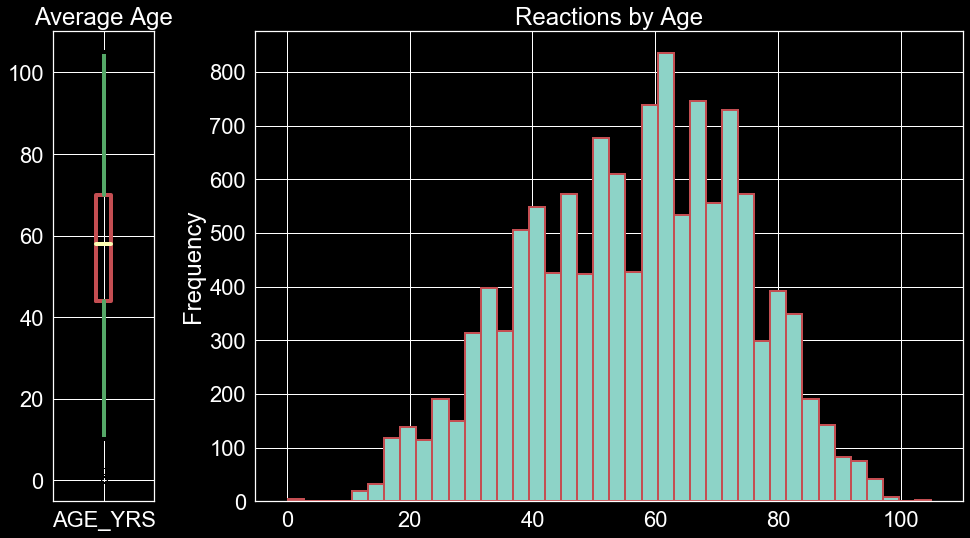

In [166]:
Blood_Clots = [
"Pulmonary embolism", 
"Thrombosis", 
"Deep vein thrombosis", 
"Anticoagulant therapy", 
"Thrombocytopenia", 
"Pulmonary thrombosis", 
"Immune thrombocytopenia", 
"Prothrombin time", 
"Thrombectomy", 
"Thrombophlebitis superficial", 
"Cerebral venous sinus thrombosis", 
"Cerebral thrombosis", 
"Portal vein thrombosis"
] 
ana_diseasegroup(merged_covid_vaers_data, Blood_Clots, 40)

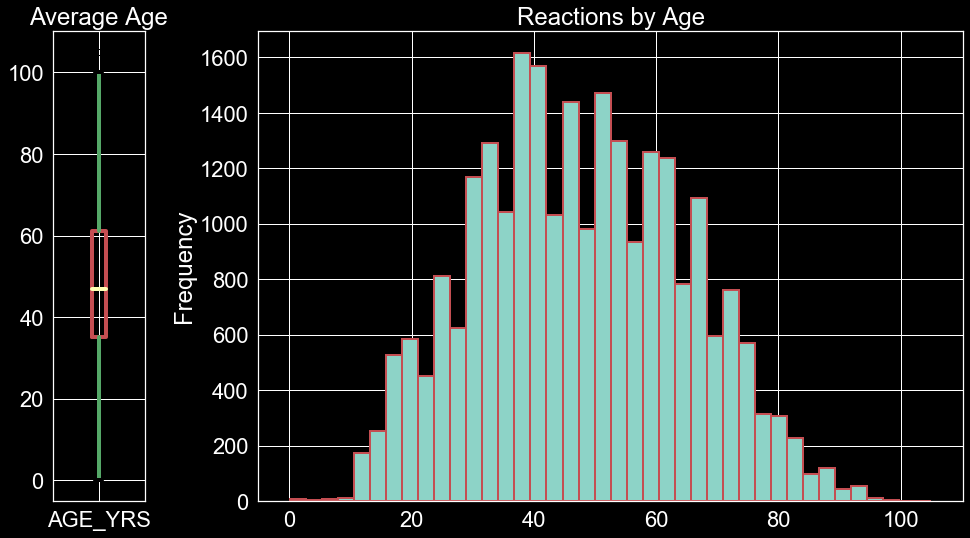

In [168]:
Heart_Irregular = [
"Echocardiogram abnormal",
"Electrocardiogram", 
"Palpitations"
] 
ana_diseasegroup(merged_covid_vaers_data, Heart_Irregular, 40)

<a name='Chart_20'></a>
# Chart 20: Covid Vax reports for babies under 3 years
[index](#index)

In [169]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 135)
pd.options.display.max_colwidth = None

df_covid_babies= merged_covid_vaers_data.loc[(merged_covid_vaers_data['AGE_YRS']< 3) ] 
df_covid_babies = df_covid_babies[df_covid_babies['VAX_TYPE']=='COVID19']
#df_covid_babies_death = df_covid_babies[df_covid_babies['DIED']=='Y']
print(df_covid_babies.nunique())
#print(df_covid_babies_death.nunique())
#print(df_covid_babies_death.columns)
df_covid_babies[['VAERS_ID', 'AGE_YRS', 'SEX','DIED', 'VAX_DATE','VAX_NAME', 'ONSET_DATE', 'CUR_ILL', 'SYMPTOM_TEXT']].drop_duplicates()

#df_covid_babies_death['DATEDIED'] = df_covid_babies_death['DATEDIED'].astype('datetime64') 
#df_covid_babies_death['VAX_DATE'] = df_covid_babies_death['VAX_DATE'].astype('datetime64') 
#df_covid_babies_death['VAX_TO_DETH_DAYS'] = df_covid_babies_death['DATEDIED'] - df_covid_babies_death['VAX_DATE'] 
#df_covid_babies_death['VAX_TO_DETH_DAYS'] = df_covid_babies_death['VAX_TO_DETH_DAYS'].astype('timedelta64[D]')

VAERS_ID           174
RECVDATE           104
STATE               31
AGE_YRS             27
CAGE_YR             30
CAGE_MO             11
SEX                  3
RPT_DATE             0
SYMPTOM_TEXT       168
DIED                 1
DATEDIED             4
L_THREAT             1
ER_VISIT             0
HOSPITAL             1
HOSPDAYS             5
X_STAY               1
DISABLE              1
RECOVD               3
VAX_DATE           110
ONSET_DATE         109
NUMDAYS             25
LAB_DATA            40
V_ADMINBY            9
V_FUNDBY             0
OTHER_MEDS          56
CUR_ILL             29
HISTORY             43
PRIOR_VAX            5
SPLTTYPE            23
FORM_VERS            1
TODAYS_DATE        101
BIRTH_DEFECT         1
OFC_VISIT            1
ER_ED_VISIT          1
ALLERGIES           42
VAX_TYPE             1
VAX_MANU             4
VAX_LOT             88
VAX_DOSE_SERIES      4
VAX_ROUTE            4
VAX_SITE             6
VAX_NAME             4
SYMPTOM1           122
SYMPTOMVERS

,VAERS_ID,AGE_YRS,SEX,DIED,VAX_DATE,VAX_NAME,ONSET_DATE,CUR_ILL,SYMPTOM_TEXT
3318,906846,0.92,F,NaN,12/22/2020,COVID19 (COVID19 (PFIZER-BIONTECH)),12/22/2020,NONE,"SITTING POST VACCINE, STARTED TO FEEL LIGHT HEADED. EE WAS GIVEN AN ICE PACK, HAD SIT DOWN IN FLOOR. PROLONGED MONITORING, NO ADDITIONAL SIDE EFFECT. EE RETURNED TO WORK."
9354,912550,1.83,F,NaN,12/23/2020,COVID19 (COVID19 (PFIZER-BIONTECH)),12/24/2020,NaN,"VAGINITIS; THIS IS A SPONTANEOUS REPORT FROM A CONTACTABLE HEALTHCARE PROFESSIONAL. A 22-MONTH-OLD FEMALE PATIENT RECEIVED THE FIRST DOSE OF BNT162B2 (PFIZER-BIONTECH COVID-19 VACCINE), VIA AN UNSPECIFIED ROUTE OF ADMINISTRATION AT THE LEFT ARM FROM 23DEC2020 13:00 AT A SINGLE DOSE FOR COVID-19 IMMUNIZATION AT A HOSPITAL. THE PATIENT MEDICAL HISTORY WAS NOT REPORTED. THE PATIENT'S CONCOMITANT MEDICATIONS WERE NOT REPORTED. THE PATIENT EXPERIENCED VAGINITIS ON 24DEC2020 13:00 WHICH WAS REPORTED TO BE TREATED WITH AN UNSPECIFIED OTC. THE PATIENT DID NOT RECEIVE ANY OTHER VACCINES WITHIN 4 WEEKS PRIOR TO THE COVID VACCINE. THE PATIENT WAS NOT DIAGNOSED WITH COVID-19 PRIOR TO VACCINATION AND WAS NOT TESTED FOR IT SINCE THE VACCINATION. THE PATIENT WAS RECOVERING FROM THE EVENT. INFORMATION ON THE BATCH NUMBER HAS BEEN REQUESTED."
10511,913550,0.58,F,NaN,12/28/1976,COVID19 (COVID19 (MODERNA)),12/29/2020,NONE,"FEVER, CHILLS, BODY ACHES,NAUSEA,HEADACHE"
11189,914161,0.50,F,NaN,12/30/2020,COVID19 (COVID19 (MODERNA)),12/30/2020,NONE,"FOLLOW INJECTION THERE WAS NO IMMEDIATE REACTION BUT, CLIENT DID HAVE A ALLERGY TO SEAFOOD. ONLY A RASH AND BENADRYL USUALLY CLEARED UP ANY REACTION IN THE PAST PER CLIENT. CLIENT WAS IN TAKEN INTO OBSERVATION ROOM FOR 30 MINUTES DUE TO HISTORY. BUT, 15 MINUTES AFTER ARRIVING CLIENT C/O FEELING ITCHY. I ASSESSED AIRWAY IMMEDIATELY AND IT WAS CLEAR. I TOOK VITALS B/P 142/94, TEMP 98.3, PULSE 90, AND O2 SAT WAS 98%. AFTER ASSESSING I ADMINISTERED BENADRYL PER PROTOCOL IM. I MAINTAINED SAFETY AT ALL TIMES AND CLIENT REMAINED IN MY OFFICE FOR 20 MINUTES AND DID EXPRESS THAT SHE FELT BETTER. I THEN TOOK A SECOND SET OF VITAL WHICH WAS WITHIN NORMAL RANGE ( TEMP 98.1, B/P 136/92, P 84, O2 SAT99%). FOLLOWING OBSERVATION CLIENT STATED SHE FELT MUCH BETTER AND DID NOT HAVE ANY ONE TO COME PICK HER UP. SO SHE WAS RELEASED AND SELF AMBULATED OUT OF THE BUILDING ( NO STAGGERING OR DIFFICULTY PRESENTED), AND DROVE SELF HOME. CALLED AND FOLLOWED-UP: SHE STATED SHE WAS OKAY AND HAD NO EXISTING SIDE EFFECT OF THE ADVERSE EVENT."
12084,914919,0.75,F,NaN,12/30/2020,COVID19 (COVID19 (PFIZER-BIONTECH)),12/30/2020,COPD/ DEMENTIA /GERD /GI BLED,PATIENT WAS VACCINATED IN THE MORNING AT A CLINIC AT A LTCF IN THE LEFT ARM AND THEN VACCINATED A SECOND TIME IN THE RIGHT ARM ON THE FLOOR IN HER ROOM
...,...,...,...,...,...,...,...,...,...
924831,1868392,0.17,F,NaN,11/09/2021,COVID19 (COVID19 (MODERNA)),11/10/2021,NONE,ON SET ATRIAL FIBRILLATION AND KIDNEY FUNCTION DROPPED 10 POINTS. NEVER HAD THESE ISSUES BEDORE BOOSTER.
925097,1868594,0.58,M,NaN,11/14/2021,COVID19 (COVID19 (JANSSEN)),11/14/2021,NaN,PATIENT FAINTED ABOUT 5 MINUTES AFTER RECIEVING SHOT
930810,1876463,0.42,F,NaN,11/01/2021,COVID19 (COVID19 (PFIZER-BIONTECH)),11/02/2021,NONE,"SINCE THE DAY AFTER BEING VACCINATED HAS HAD CONSTANT DIZZNESS, LIGHTHEADNESS, CHILLS, BODY SHAKES, WHEEZING, LUNG INFLAMMATION, FEVERISH 99.5, BRONCHIAL COUGH AND CHEST TIGHTNESS EVEN 72HOURS AFTER. IS STILL HAVING SYMPTOMS OF DIZZNESS, LIGHTHEADNESS, CHILLS, BODY SHAKES, INFLAMMATION OF LUNG AND CHEST TIGHTNESS. BRONCHIAL COUGH HAS SUBSIDED. WHESSING IS ACUTE."
931434,1876918,0.50,F,NaN,09/29/2021,COVID19 (COVID19 (MODERNA)),09/29/2021,NaN,VACCINE ADMINISTERED BEYOND THE BEST USED DATE BUT BEFORE EXPIRATION DATE.


## VAX batch analysis
### VAERS state information can be found at https://vaers.hhs.gov/esub/index.jsp
AK - Alaska
AL - Alabama
AR - Arkansas
AZ - Arizona
CA - California
CO - Colorado
CT - Connecticut
DC - District of Columbia
DE - Delaware
FL - Florida
GA - Georgia
HI - Hawaii
IA - Iowa
ID - Idaho
IL - Illinois
IN - Indiana
KS - Kansas
KY - Kentucky
LA - Louisiana
MA - Massachusetts
MD - Maryland
ME - Maine
MI - Michigan
MN - Minnesota
MO - Missouri
MS - Mississippi
MT - Montana
NC - North Carolina
ND - North Dakota
NE - Nebraska
NH - New Hampshire
NJ - New Jersey
NM - New Mexico
NV - Nevada
NY - New York
OH - Ohio
OK - Oklahoma
OR - Oregon
PA - Pennsylvania
RI - Rhode Island
SC - South Carolina
SD - South Dakota
TN - Tennessee
TX - Texas
UT - Utah
VA - Virginia
VT - Vermont
WA - Washington
WI - Wisconsin
WV - West Virginia
WY - Wyoming
AS - American Samoa
FM - Federated States of Micronesia
GU - Guam
MH - Marshall Islands
MP - Northern Mariana Islands
PR - Puerto Rico
PW - Palau
QM - Midway Islands
QW - Wake Island
VI - US Virgin Islands
XB - Baker Island
XH - Howland Island
XL - Palmyra Atoll
XM - Kingman Reef
XQ - Jarvis Island
XU - Johnston Atoll
XV - Navassa Island
US - USA
FR - Foreign
### Important terms:
- Vaccine manufacturer (VAX_MANU): This field identifies the manufacturer of the each of the vaccines listed.
- Manufacturers vaccine lot (VAX_LOT): This field identified the lot number of the vaccines listed.
- Doses administered (VAERS_DOSE_SERIES): This field identifies the vaccine dose of the recorded vaccines listed. The VAERS 1 field VAX_DOSE was discontinued in the VAERS 2 form; when a value exists, a 1 is added to equate to the VAX_DOSE_SERIES field.
- Vaccination route (VAX_ROUTE): This field identifies the vaccine route of administration.
- Vaccination site (VAX_SITE): This field identified the anatomic site where the vaccination was administered.
- Vaccine name (VAX_NAME): This field provides the brand name of the vaccine administered

### A sample VAERS report form

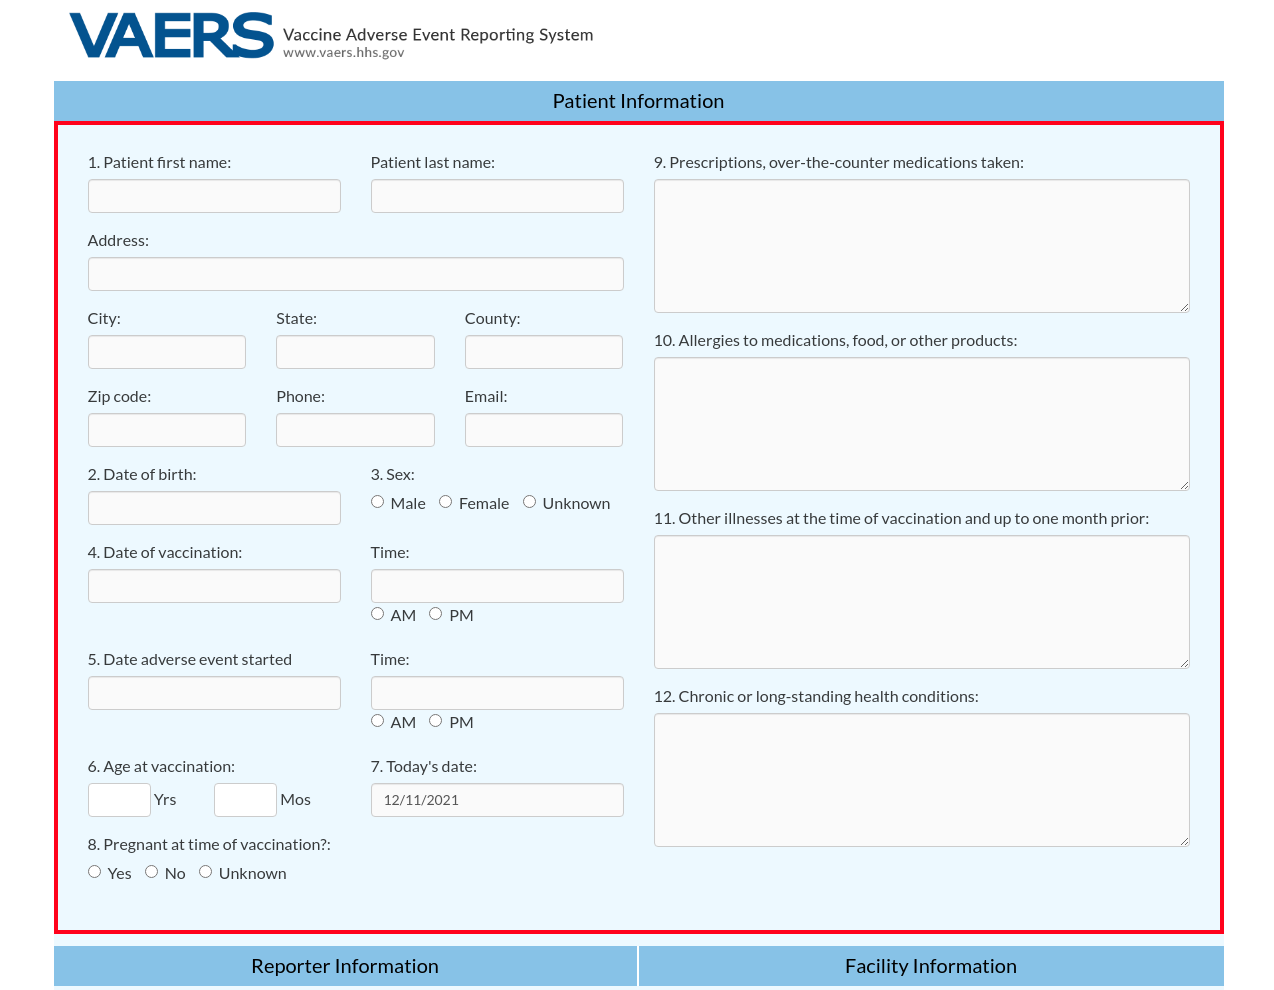

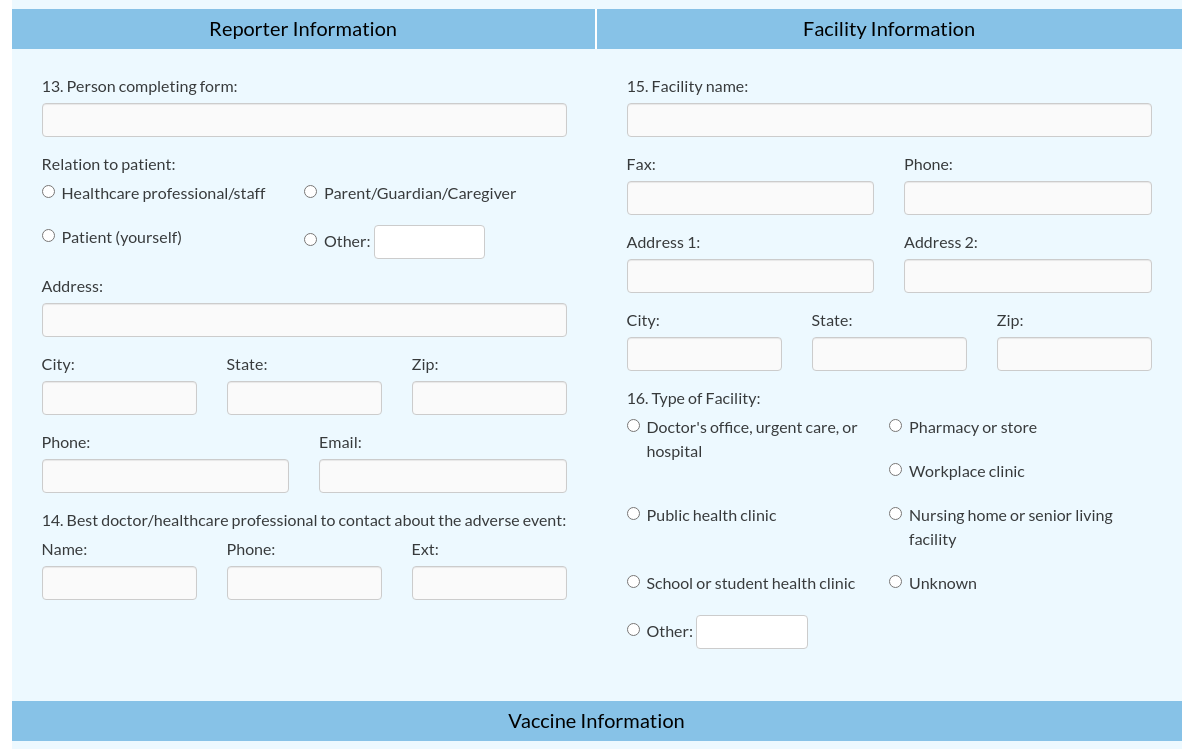


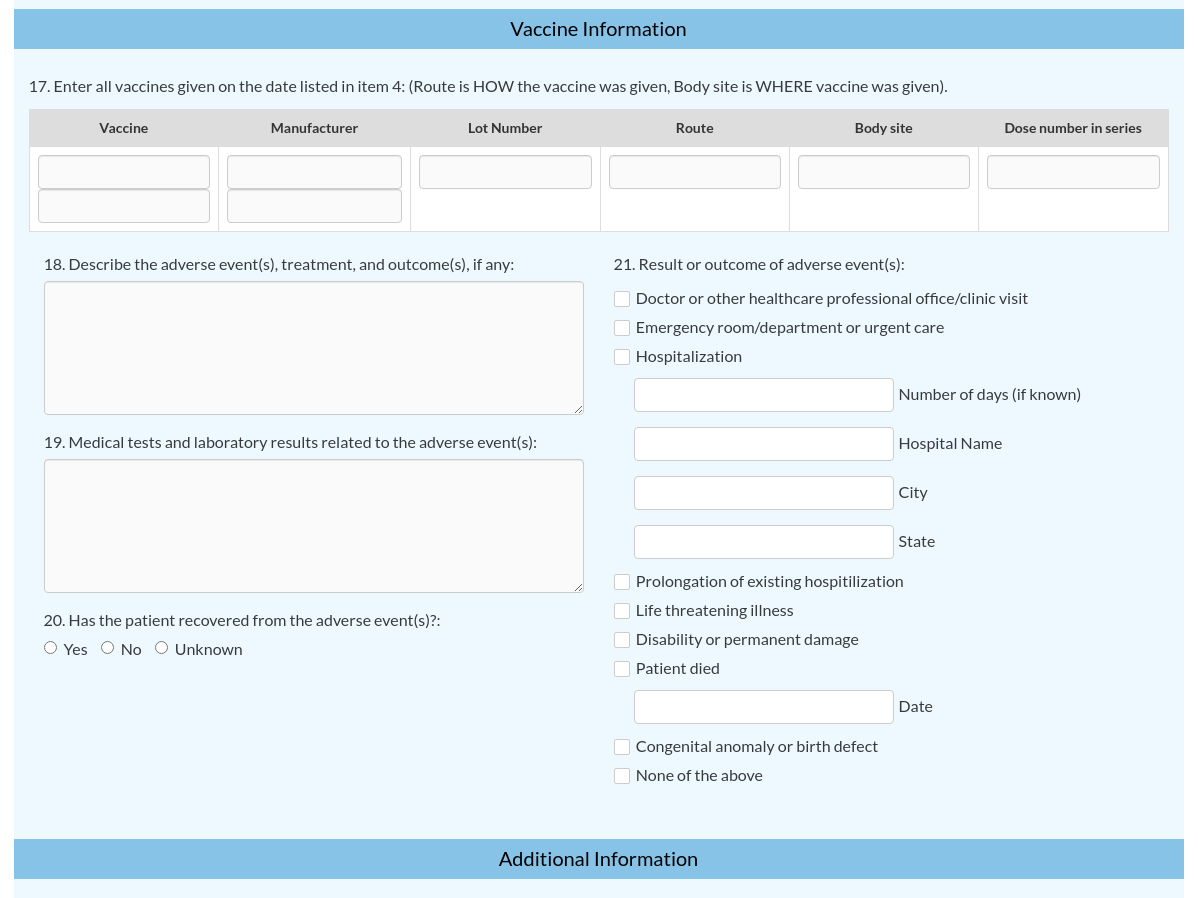

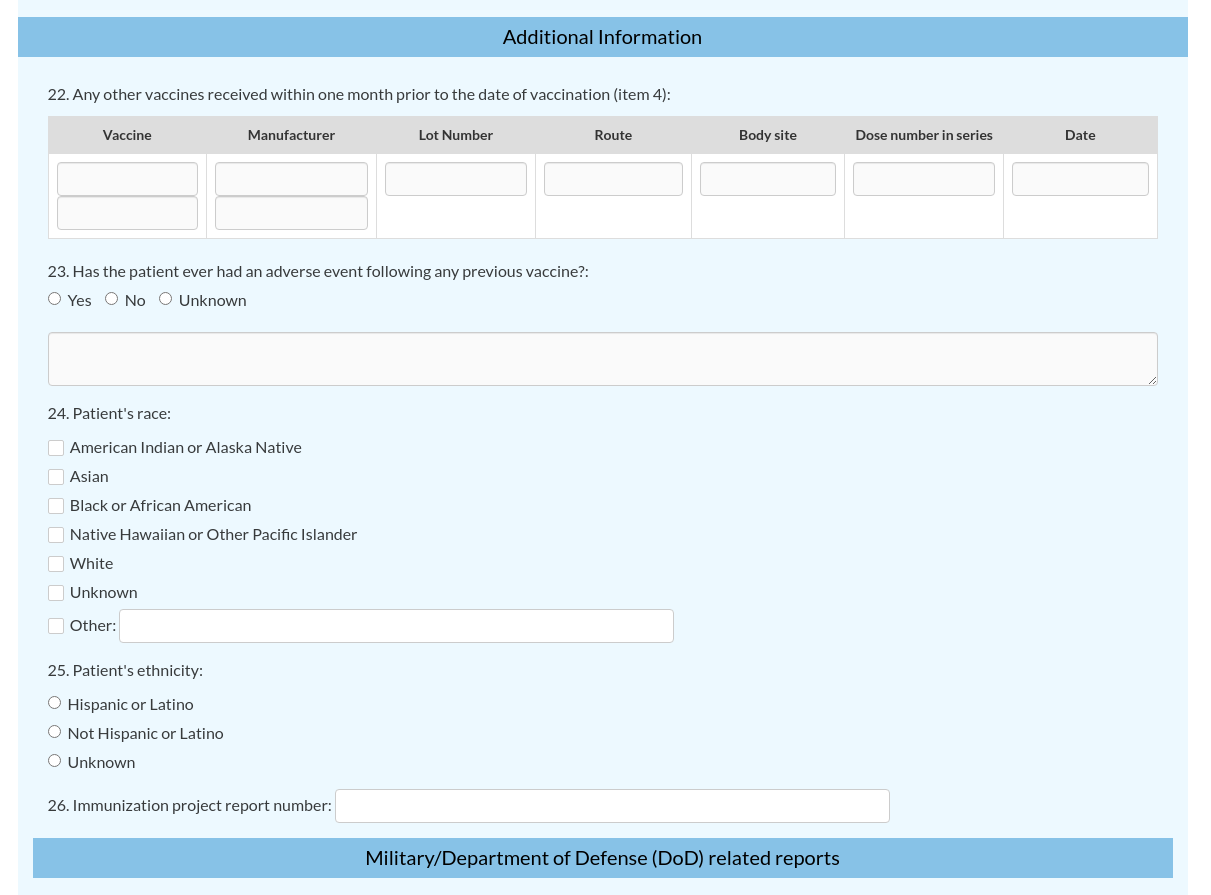

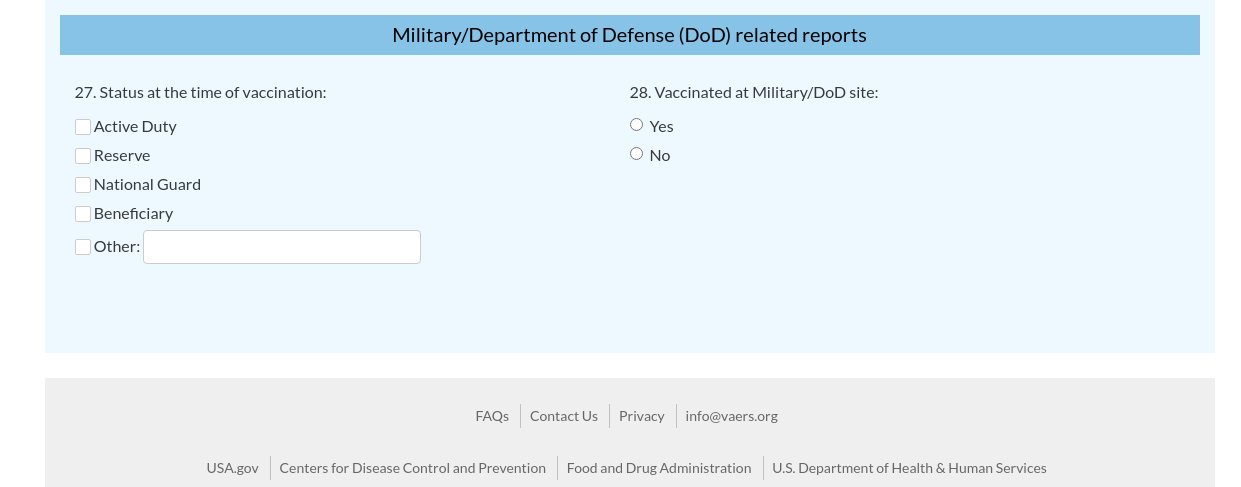

In [234]:
state_color = [
{'color':'Blue', 'STATE': 'AZ', 'FULL_STATE':'Arizona'},
{'color':'Blue', 'STATE': 'CA', 'FULL_STATE':'California'},
{'color':'Blue', 'STATE': 'CO', 'FULL_STATE':'Colorado'},
{'color':'Blue', 'STATE': 'CT', 'FULL_STATE':'Connecticut'},
{'color':'Blue', 'STATE': 'DE', 'FULL_STATE':'Delaware'},
{'color':'Blue', 'STATE': 'GA', 'FULL_STATE':'Georgia'},
{'color':'Blue', 'STATE': 'HI', 'FULL_STATE':'Hawaii'},
{'color':'Blue', 'STATE': 'IL', 'FULL_STATE':'Illinois'},
{'color':'Blue', 'STATE': 'ME', 'FULL_STATE':'Maine'},
{'color':'Blue', 'STATE': 'MD', 'FULL_STATE':'Maryland'},
{'color':'Blue', 'STATE': 'MA', 'FULL_STATE':'Massachusetts'},
{'color':'Blue', 'STATE': 'MI', 'FULL_STATE':'Michigan'},
{'color':'Blue', 'STATE': 'MN', 'FULL_STATE':'Minnesota'},
{'color':'Blue', 'STATE': 'NV', 'FULL_STATE':'Nevada'},
{'color':'Blue', 'STATE': 'NH', 'FULL_STATE':'New_Hampshire'},
{'color':'Blue', 'STATE': 'NJ', 'FULL_STATE':'New_Jersey'},
{'color':'Blue', 'STATE': 'NM', 'FULL_STATE':'New_Mexico'},
{'color':'Blue', 'STATE': 'NY', 'FULL_STATE':'New_York'},
{'color':'Blue', 'STATE': 'OR', 'FULL_STATE':'Oregon'},
{'color':'Blue', 'STATE': 'PA', 'FULL_STATE':'Pennsylvania'},
{'color':'Blue', 'STATE': 'RI', 'FULL_STATE':'Rhode_Island'},
{'color':'Blue', 'STATE': 'VT', 'FULL_STATE':'Vermont'},
{'color':'Blue', 'STATE': 'VA', 'FULL_STATE':'Virginia'},
{'color':'Blue', 'STATE': 'WA', 'FULL_STATE':'Washington'},
{'color':'Blue', 'STATE': 'WI', 'FULL_STATE':'Wisconsin'},
{'color':'Red',  'STATE': 'AL', 'FULL_STATE':'Alabama'},
{'color':'Red',  'STATE': 'AK', 'FULL_STATE':'Alaska'},
{'color':'Red',  'STATE': 'AR', 'FULL_STATE':'Arkansas'},
{'color':'Red',  'STATE': 'FL', 'FULL_STATE':'Florida'},
{'color':'Red',  'STATE': 'ID', 'FULL_STATE':'Idaho'},
{'color':'Red',  'STATE': 'IN', 'FULL_STATE':'Indiana'},
{'color':'Red',  'STATE': 'IA', 'FULL_STATE':'Iowa'},
{'color':'Red',  'STATE': 'KS', 'FULL_STATE':'Kansas'},
{'color':'Red',  'STATE': 'KY', 'FULL_STATE':'Kentucky'},
{'color':'Red',  'STATE': 'LA', 'FULL_STATE':'Louisiana'},
{'color':'Red',  'STATE': 'MS', 'FULL_STATE':'Mississippi'},
{'color':'Red',  'STATE': 'MO', 'FULL_STATE':'Missouri'},
{'color':'Red',  'STATE': 'MT', 'FULL_STATE':'Montana'},
{'color':'Red',  'STATE': 'NE', 'FULL_STATE':'Nebraska'},
{'color':'Red',  'STATE': 'NC', 'FULL_STATE':'North_Carolina'},
{'color':'Red',  'STATE': 'ND', 'FULL_STATE':'North_Dakota'},
{'color':'Red',  'STATE': 'OH', 'FULL_STATE':'Ohio'},
{'color':'Red',  'STATE': 'OK', 'FULL_STATE':'Oklahoma'},
{'color':'Red',  'STATE': 'SC', 'FULL_STATE':'South_Carolina'},
{'color':'Red',  'STATE': 'SD', 'FULL_STATE':'South_Dakota'},
{'color':'Red',  'STATE': 'TN', 'FULL_STATE':'Tennessee'},
{'color':'Red',  'STATE': 'TX', 'FULL_STATE':'Texas'},
{'color':'Red',  'STATE': 'UT', 'FULL_STATE':'Utah'},
{'color':'Red',  'STATE': 'WV', 'FULL_STATE':'West_Virginia'},
{'color':'Red',  'STATE': 'WY', 'FULL_STATE':'Wyoming'}
]
df_state_color = pd.DataFrame(state_color)
df_state_color


,color,STATE,FULL_STATE
0,Blue,AZ,Arizona
1,Blue,CA,California
2,Blue,CO,Colorado
3,Blue,CT,Connecticut
4,Blue,DE,Delaware
5,Blue,GA,Georgia
6,Blue,HI,Hawaii
7,Blue,IL,Illinois
8,Blue,ME,Maine
9,Blue,MD,Maryland


In [263]:
short_print(2, 100) # print 2 records, with max 100 characters per colomn
merged_covid_vaers_data1 = dirty_df_covid_patients.merge(dirty_df_covid_vax, on = 'VAERS_ID', how = 'inner')
merged_covid_vaers_data1_death = merged_covid_vaers_data1.loc[merged_covid_vaers_data1['DIED']=='Y']
merged_covid_vaers_data1_death = merged_covid_vaers_data1_death.merge(df_state_color, on = "STATE", how='inner')
merged_covid_vaers_data1_death

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,color,FULL_STATE
0,909095,12/25/2020,CO,66.0,66.0,NaN,M,NaN,on 12/24/2020 the resident was sleepy and stayed in bed most of the shift. He stated he was doi...,Y,12/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/23/2020,12/25/2020,2.0,None,SEN,NaN,"Tamsulosin 0.4mg, Lactobacillus tablet, Nephro-vite tablet 0.8mg, Allopurinol 100mg, ferrous glu...","End stage renal disease with dependence on renal dialysis, COPD, cirrhosis of the liver, hypokal...","Refused dialysis frequently resulting in episodes of hypokalemia and hospitalization, resident d...",NaN,NaN,2,12/25/2020,NaN,NaN,NaN,"alprazolam, Lorazepam",COVID19,MODERNA,011J20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Blue,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,1829189,10/29/2021,ME,77.0,77.0,NaN,M,NaN,Patient hospitalized after testing positive for COVID.,Y,10/07/2021,NaN,NaN,NaN,NaN,NaN,NaN,N,02/12/2021,09/30/2021,230.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,10/29/2021,NaN,NaN,NaN,none,COVID19,PFIZER\BIONTECH,EN6203,2,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blue,Maine


In [280]:
short_print(30,100)
merged_covid_vaers_data1_death_remove_duplicated = merged_covid_vaers_data1_death[['VAERS_ID','DATEDIED', 'VAX_MANU','VAX_LOT','VAX_ROUTE', 'STATE',  'VAX_DOSE_SERIES', 'color']]
merged_covid_vaers_data1_death_remove_duplicated.loc[merged_covid_vaers_data1_death_remove_duplicated['VAX_DOSE_SERIES'] > '2']


,VAERS_ID,DATEDIED,VAX_MANU,VAX_LOT,VAX_ROUTE,STATE,VAX_DOSE_SERIES,color
1,948418,01/12/2021,PFIZER\BIONTECH,EK5730,IM,CO,UNK,Blue
2,948418,01/12/2021,PFIZER\BIONTECH,EK9231,IM,CO,UNK,Blue
12,1034192,02/16/2021,MODERNA,NaN,NaN,CO,UNK,Blue
15,1061077,02/28/2021,MODERNA,NaN,NaN,CO,UNK,Blue
17,1091957,02/23/2021,MODERNA,NaN,NaN,CO,UNK,Blue
...,...,...,...,...,...,...,...,...
8028,1145662,03/13/2021,PFIZER\BIONTECH,NaN,NaN,ME,UNK,Blue
8035,1361500,05/28/2021,JANSSEN,NaN,IM,ME,UNK,Blue
8037,1423016,NaN,JANSSEN,Unknown,NaN,ME,UNK,Blue
8038,1445698,05/01/2021,JANSSEN,NaN,NaN,ME,UNK,Blue


In [306]:
merged_covid_vaers_data1_death_remove_duplicated= merged_covid_vaers_data1_death_remove_duplicated.applymap(lambda s:s.upper() if type(s) == str else s)

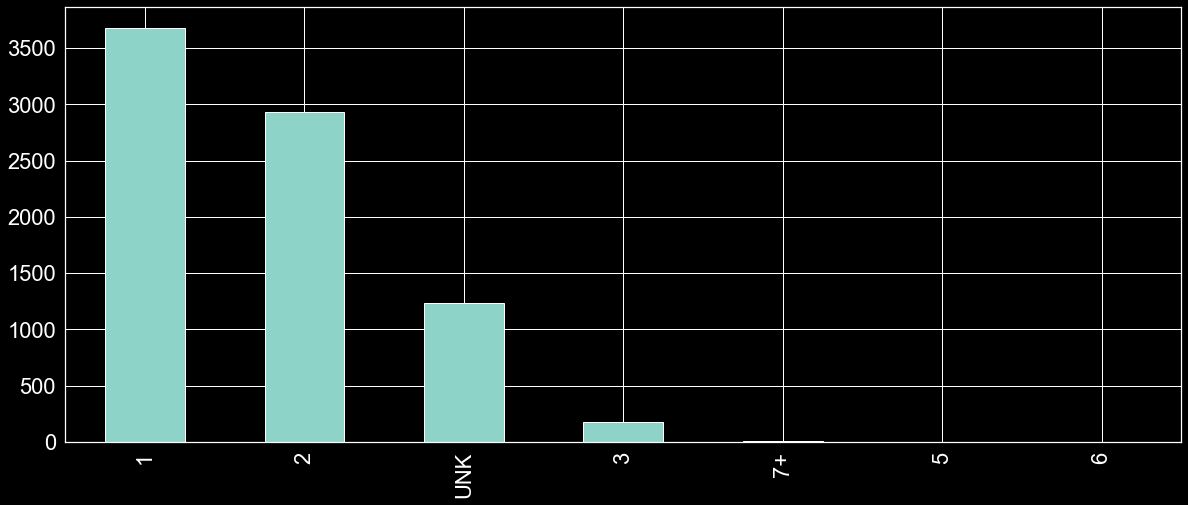

In [307]:
short_print(20, 100)
fig = plt.figure(figsize=FIGSIZE2)
merged_covid_vaers_data1_death_remove_duplicated.VAX_DOSE_SERIES.value_counts().plot.bar()

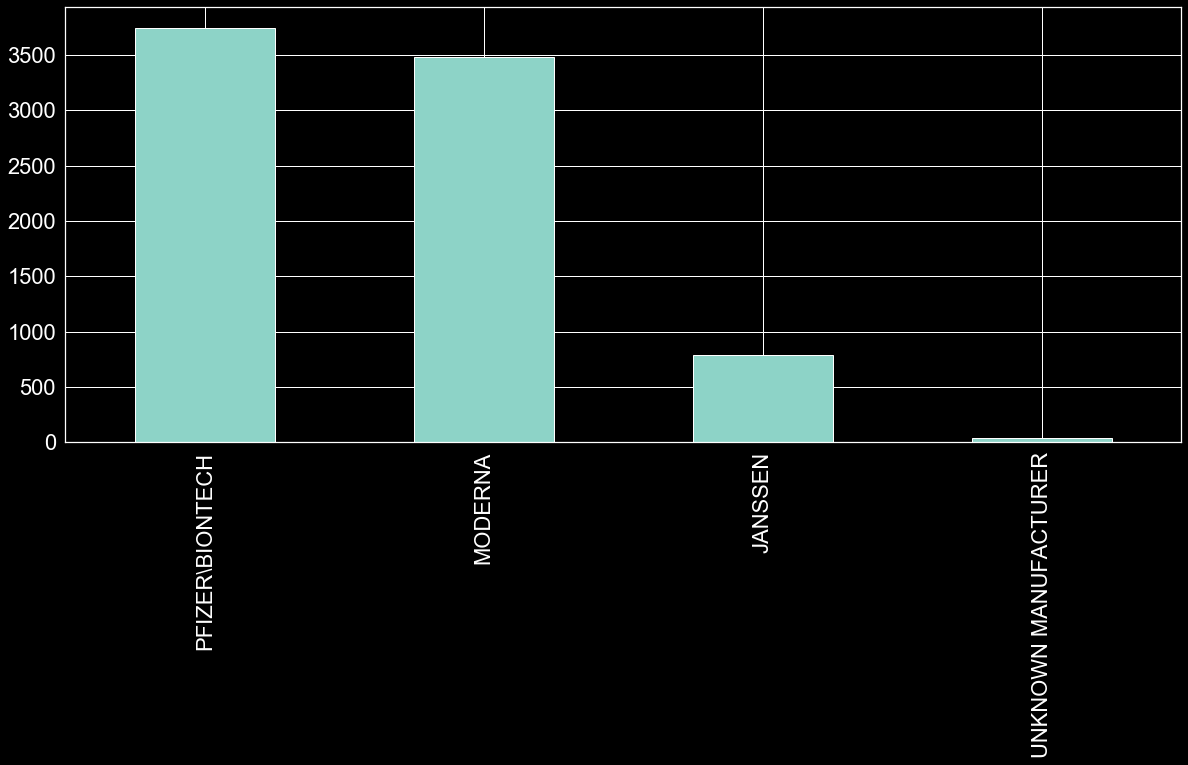

In [308]:
fig = plt.figure(figsize=FIGSIZE2)
merged_covid_vaers_data1_death_remove_duplicated.VAX_MANU.value_counts().plot.bar()

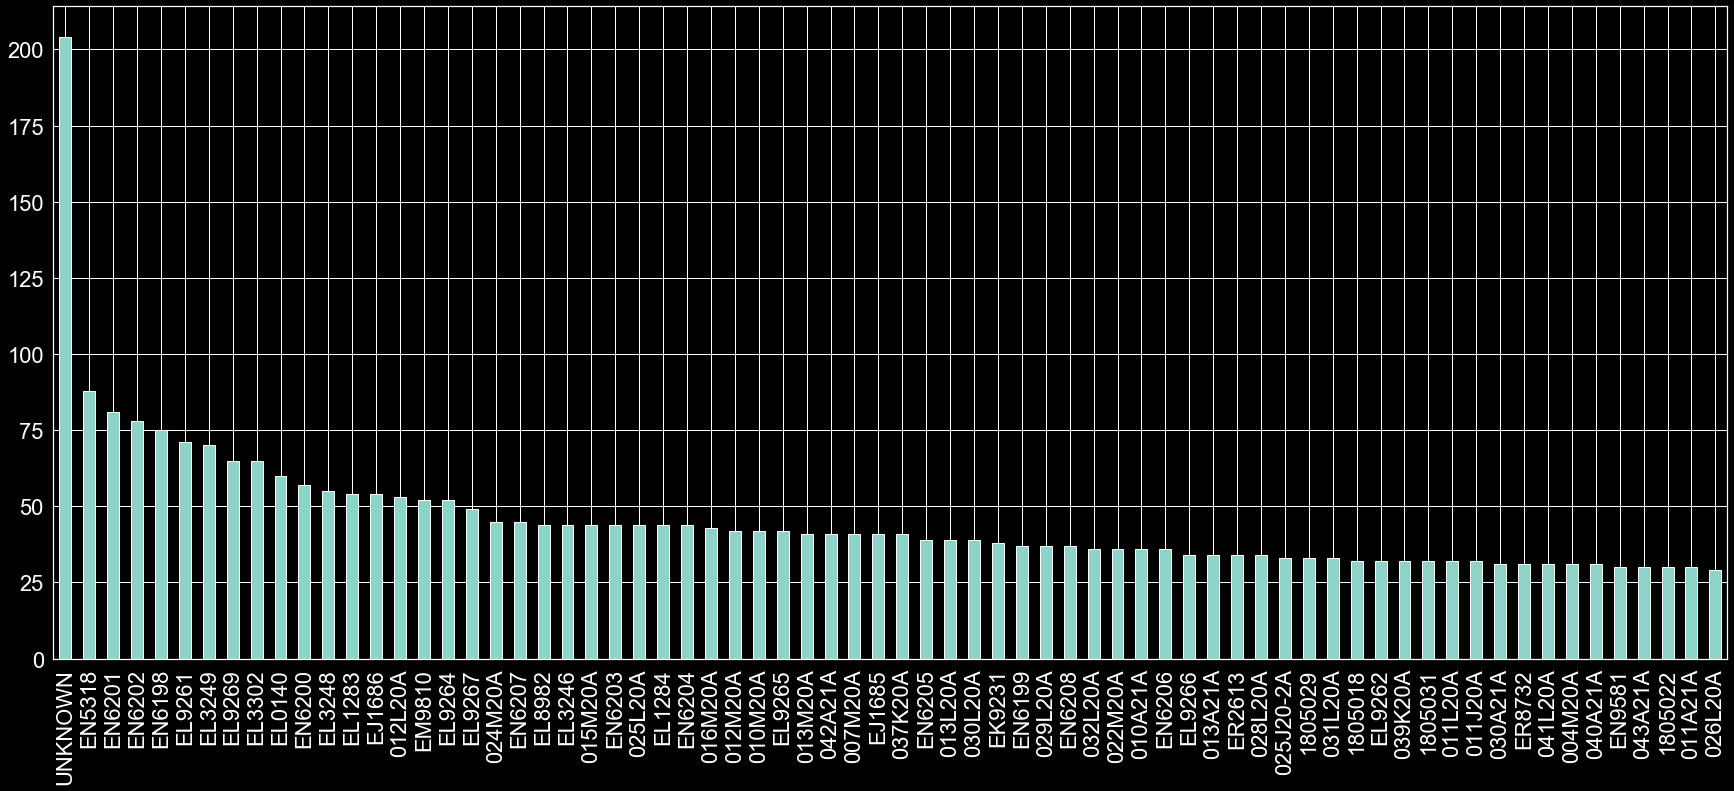

In [309]:
fig = plt.figure(figsize=FIGSIZE3)
merged_covid_vaers_data1_death_remove_duplicated.VAX_LOT.value_counts()[:70].plot.bar()

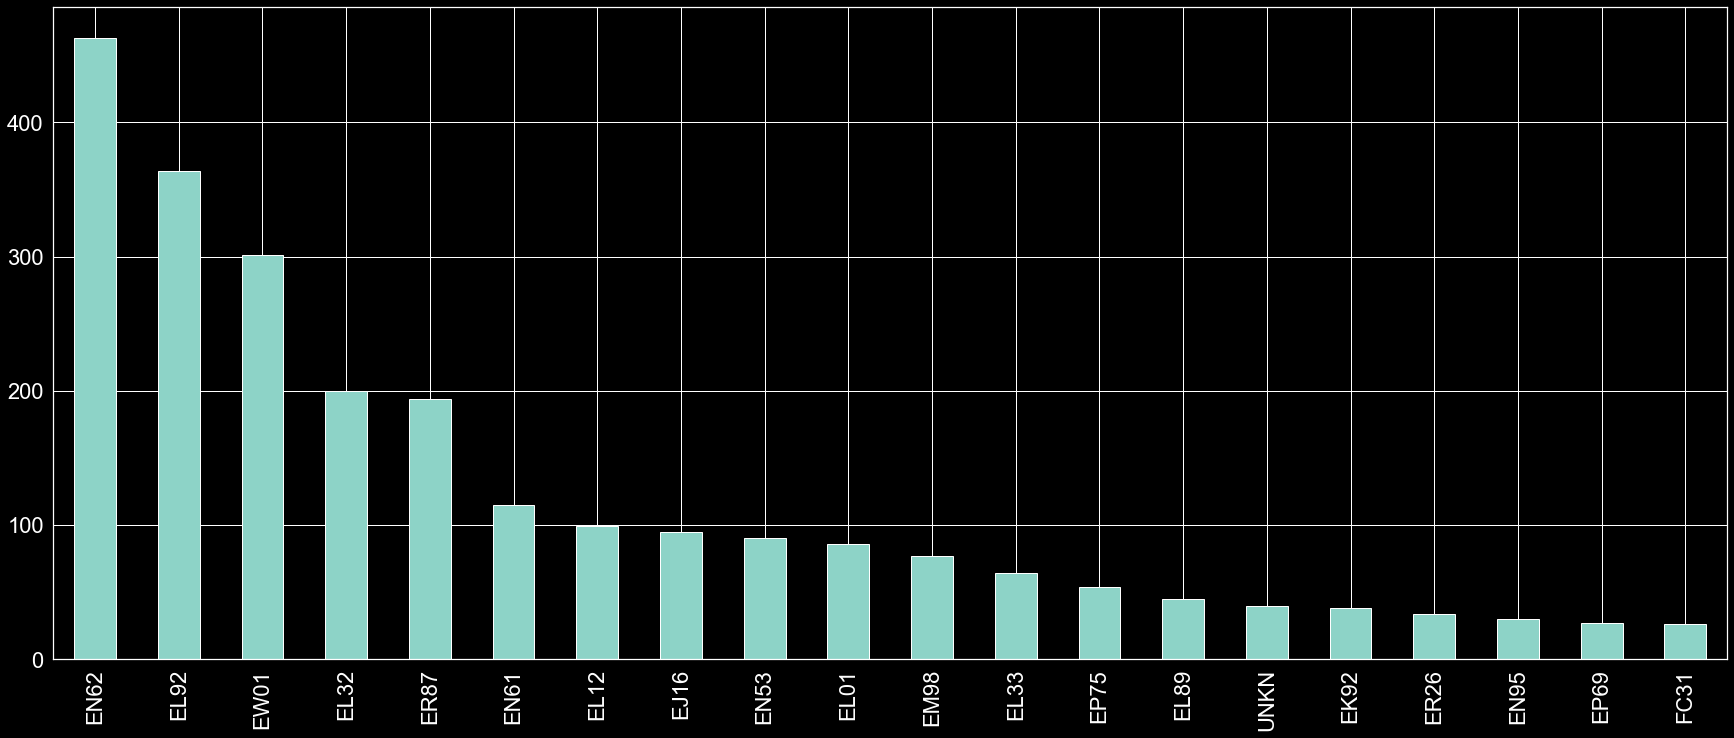

In [326]:
fig = plt.figure(figsize=FIGSIZE3)
merged_covid_vaers_data1_death_remove_duplicated.loc[merged_covid_vaers_data1_death_remove_duplicated['VAX_MANU']=='PFIZER\BIONTECH'].VAX_LOT.str[:4].value_counts()[:20].plot.bar()

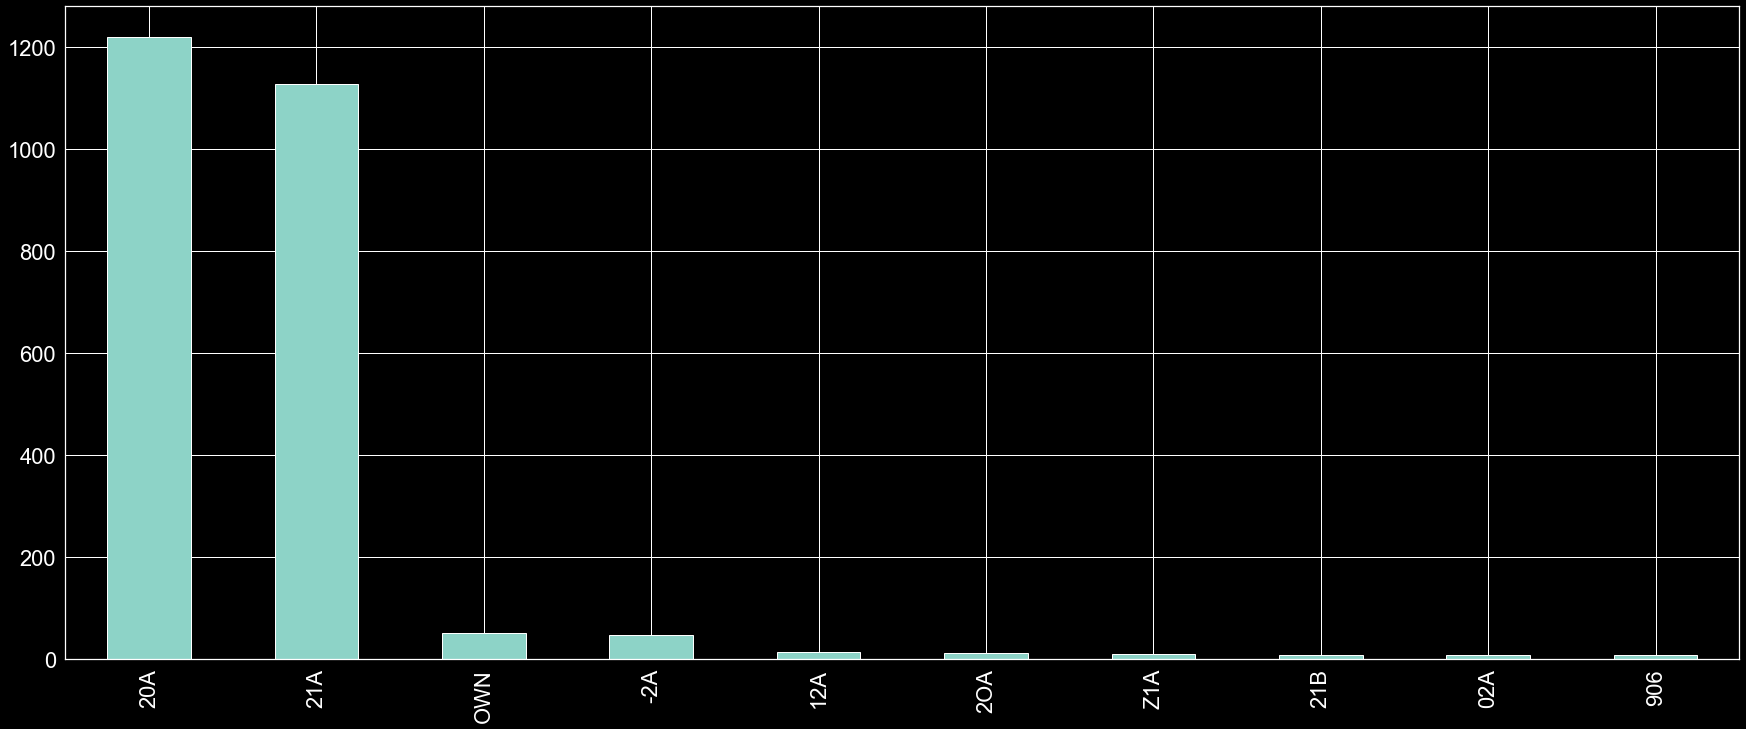

In [321]:
fig = plt.figure(figsize=FIGSIZE3)
merged_covid_vaers_data1_death_remove_duplicated.loc[merged_covid_vaers_data1_death_remove_duplicated['VAX_MANU']=='MODERNA'].VAX_LOT.str[-3:].value_counts()[:10].plot.bar()

In [267]:
merged_covid_vaers_data1_death_remove_duplicated.loc[merged_covid_vaers_data1_death_remove_duplicated['VAX_LOT']=='EN5318'].color.value_counts()

Blue    48
Red     39
Name: color, dtype: int64

In [270]:
merged_covid_vaers_data1_death_remove_duplicated.color.value_counts()

Blue    4215
Red     3838
Name: color, dtype: int64